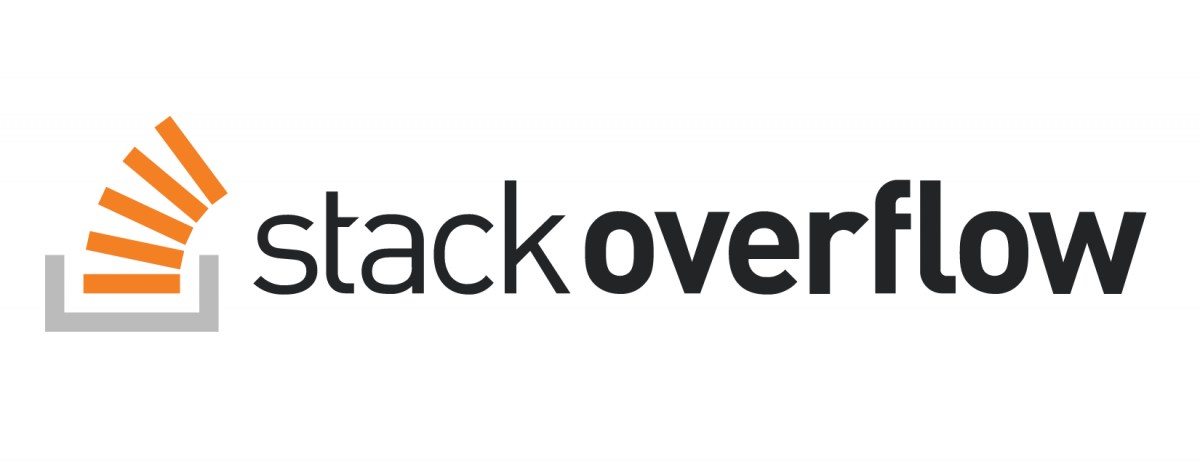

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import re, nltk, spacy, gensim
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from gensim.utils import tokenize
from gensim.models import word2vec

from pprint import pprint# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn

import pickle
import cloudpickle

# <font color="#1d479b">Approche non supervisée: LDA - Latent Dirichlet Allocation</font>


In [3]:
data_lemmatized = pd.read_csv('./data/3.csv', index_col =False)
data_lemmatized = data_lemmatized.dropna(axis=0)
print(data_lemmatized.shape)
data_lemmatized.head()

(2002, 101)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,calculate age base datetime type birthday,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,calculate relative time cdiese,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,versione server database,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,make sure email send mark spam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,definitive guide form base website authentication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data_lemmatized = data_lemmatized.drop(data_lemmatized.iloc[:, 1:], axis=1)
print(data_lemmatized.shape)
data_lemmatized.head()

(2002, 1)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
0,calculate age base datetime type birthday
1,calculate relative time cdiese
2,versione server database
3,make sure email send mark spam
4,definitive guide form base website authentication


In [5]:
#test size None,test size = 0.25 
#random_state= 42 to have the same output everytime I run
X_train, X_test= train_test_split(data_lemmatized[["Title"]],random_state=42)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
X_test.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
1404,break format nsstre multiple line
357,intellisense text script template
1344,problem post large amount datum web server iphone
913,delete post day old
1300,write mysql query look element key array


## <font color="#337da4">GridSearchCV sur les vectorizers</font>

In [7]:
estimator = LatentDirichletAllocation(
    # n docs in each learning iter
    batch_size=128, 
    doc_topic_prior=None,
    # compute perplexity every n iters, default: -1
    evaluate_every=-1, 
    learning_decay=0.7,
    #To have the best parametres, we use online variational Bayes algorithm
    learning_method='online', 
    
    learning_offset=10.0,
    max_doc_update_iter=100, 
    max_iter=10, 
    mean_change_tol=0.001,
    #n_topics à 20 ..then use GridSearch to find n_topics
    n_components=20, 
    # Use all available CPUs
    n_jobs=-1,       
    perp_tol=0.1,
    # Attention ... 
    # Random state to change
    random_state=42, 
    topic_word_prior=None,
    total_samples=1000000.0, 
    verbose=0)

#GridSearch for tfidf transformers, ngram_range, max_features

pipeline = Pipeline([
                    ("transformer", Pipeline([
                                              ("vect", CountVectorizer()),
                                              ("tfidf", TfidfTransformer())])),
                    ("clf", estimator)])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}



lda_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = None)
lda_gs.fit(X_train["Title"])

# Best Model
best_lda = lda_gs.best_estimator_
print("Best Model's Params: ", lda_gs.best_params_)
print("Best log-likelihood score: ", lda_gs.best_score_)
#time 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best log-likelihood score:  -7579.295186517568


**Un modèle avec une log-vraisemblance plus élevée est considéré comme bon.**

In [8]:
estimator = LatentDirichletAllocation(
    # n docs in each learning iter
    batch_size=128, 
    doc_topic_prior=None,
    # compute perplexity every n iters, default: -1
    evaluate_every=-1, 
    learning_decay=0.7,
    #To have the best parametres, we use online variational Bayes algorithm
    learning_method='online', 
    
    learning_offset=10.0,
    max_doc_update_iter=100, 
    max_iter=10, 
    mean_change_tol=0.001,
    #n_topics à 20 ..then use GridSearch to find n_topics
    n_components=20, 
    # Use all available CPUs
    n_jobs=-1,       
    perp_tol=0.1,
    # Attention ... 
    # Random state to change
    random_state=42, 
    topic_word_prior=None,
    total_samples=1000000.0, 
    verbose=0)


#Try again for the tf-idf vectorizer
pipeline = Pipeline([
                    ("transformer", TfidfVectorizer()),
                     ("clf", estimator)])

parameters = { 
"transformer__max_features": [50000,5000, 3000, 1000]
}



lda_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = None)
lda_gs.fit(X_train["Title"])

# Best Model
best_model1 = lda_gs.best_estimator_# Model Parameters
print("Best Model's Params: ", lda_gs.best_params_)
print("Best log-likelihood score: ", lda_gs.best_score_)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__max_features': 1000}
Best log-likelihood score:  -7698.956527104684


## <font color="#337da4">4 vectorizers</font>

In [9]:
# Build  Models
lda_model = LatentDirichletAllocation(
    # n docs in each learning iter
    batch_size=128,
    doc_topic_prior=None,
    # compute perplexity every n iters, default: -1
    evaluate_every=-1, 
    learning_decay=0.7,
    #To change: to have the best parametres, we use online variational Bayes algorithm
    learning_method='online',
    learning_offset=10.0,
    max_doc_update_iter=100, 
    max_iter=10, 
    mean_change_tol=0.001,
    #n_topics à 20 ..then use GridSearch to find n_topics
    n_components=20,  
    # Use all available CPUs
    n_jobs=-1,       
    perp_tol=0.1,
    # Random state = int to stabilize output
    random_state=100, 
    topic_word_prior=None,
    total_samples=1000000.0, 
    verbose=0)


count_vectorizer = CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                 
                                   # GridSearch: max number of uniq words 
                                 max_features=1000)  

#Max_df=0.9 will remove words that appear in more than 90% of the reviews.
#Min_df=25 will remove words that appear in less than 25 reviews. 
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   
                                   # GridSearch: max number of uniq words 
                                   max_features=1000, 
                                   use_idf=False)


#TfidfTransformer
pipeline2_vec = Pipeline([('count', CountVectorizer(analyzer='word',
                                                    # minimum occurences of a word at leat 10 times
                                                    min_df =10,    
                                                    # remove stop words
                                                    stop_words='english',
                                                    # convert all words to lowercase
                                                    lowercase=True,     
                                                    # # num chars > 2 
                                                    token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                    
                                                    # GridSearch: max number of uniq words 
                                                    max_features=1000)),
                           ('tfid', TfidfTransformer())])

#n_grammes
pipeline1_vec = make_pipeline(CountVectorizer(
    
    #see GridSearch
    ngram_range=(1, 1),
    
    analyzer='word',
    # minimum occurences of a word at leat 10 times
    min_df =10,    
    # remove stop words
    stop_words='english',
    # convert all words to lowercase
    lowercase=True,     
    # # num chars > 2 
    token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
    
    # GridSearch: max number of uniq words 
    max_features=1000),
                              #Transform a count matrix to a normalized tf or tf-idf representation
                              #tf-idf = term-frequency times inverse document-frequency. 
                              TfidfTransformer())

########################
#Initialize dict results
dict_Likelihood = {}
dict_Perplexity = {}

#list of models
models = [lda_model]

#list of methods
methods = []
methods.append(('count_vectorizer', count_vectorizer))
methods.append(('tfidf_vectorizer', tfidf_vectorizer))
methods.append(('n_gram_tf_idfmer', pipeline1_vec))
methods.append(('tf_idf_tranformer', pipeline2_vec))

for model in models:
    for name, vectorizer in methods :
        vectorizer.fit(X_train["Title"].values.astype('U'))            
        feat_train = vectorizer.transform(X_train["Title"].values.astype('U'))
        feat_test= vectorizer.transform(X_test["Title"].values.astype('U'))

        
        output = model.fit(feat_train)
        # Calculate approximate log-likelihood as score.
        dict_Likelihood[name] =model.score(feat_test)
        dict_Perplexity[name] =model.perplexity(feat_test)
    
        
#print(lda_model.get_params())
print("dict_Likelihood:", dict_Likelihood)
print("-------------------------------------")
print("dict_Perplexity:",dict_Perplexity)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_Likelihood: {'count_vectorizer': -5908.99591420239, 'tfidf_vectorizer': -2227.606361075571, 'n_gram_tf_idfmer': -4577.8455480000475, 'tf_idf_tranformer': -4577.8455480000475}
-------------------------------------
dict_Perplexity: {'count_vectorizer': 447.7945896885681, 'tfidf_vectorizer': 191.48718577509288, 'n_gram_tf_idfmer': 1798.5528791617417, 'tf_idf_tranformer': 1798.5528791617417}



## <font color="#337da4">Choix du meilleur vectorizer</font>

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


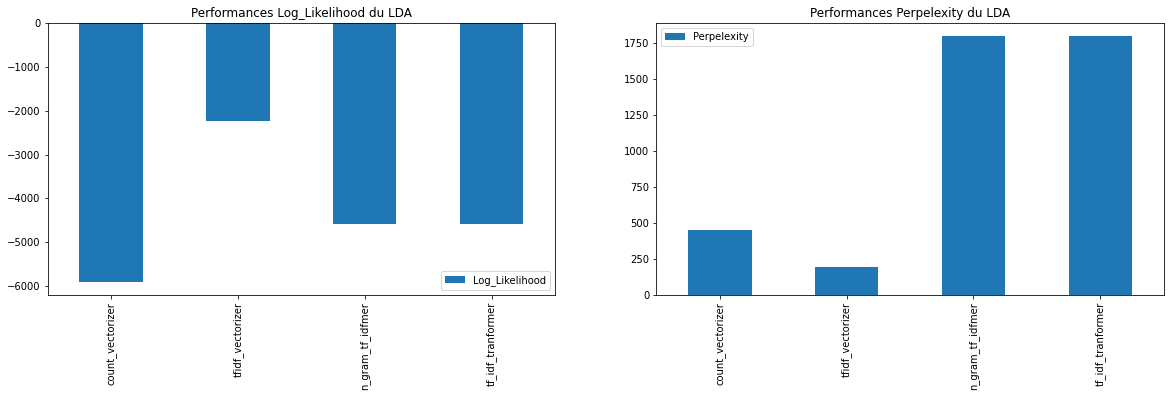

<Figure size 1440x360 with 0 Axes>

In [10]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

figure, axes = plt.subplots(1, 2)

#Dictionaries to dataframe
df_Likelihood = pd.DataFrame.from_dict(dict_Likelihood, orient='index',columns=["Log_Likelihood"])
df_Perplexity= pd.DataFrame.from_dict(dict_Perplexity, orient='index',columns=["Perpelexity"])



ax1 = df_Likelihood.plot(ax=axes[0], kind='bar')
ax1.set_title("Performances Log_Likelihood du LDA")
ax2 = df_Perplexity.plot(ax=axes[1], kind='bar')
ax2.set_title("Performances Perpelexity du LDA")

plt.figure();

Un modèle avec une **vraisemblance logarithmique** plus élevée et 

une **perplexité** plus faible `(exp(-1. * log-vraisemblance par mot))` est considéré comme bon.

**<font color="green">Ainsi le `tfidf_vectorizer` obtient les meilleurs résultats avec un Log_Likelihood plus élevé et une Perplexity plus faible. On choisira donc cette méthode pour prédire nos topics</font>**

## <font color="#337da4">GridSearchCV de la LDA</font>

In [ ]:
#data_lemmatized = pd.read_csv('3.csv', index_col =False)
#data_lemmatized["Title"] = data_lemmatized["Title"].astype(str)
#data_lemmatized = data_lemmatized.dropna(axis=0)
#data_lemmatized.head()

In [11]:
X_test.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
1404,break format nsstre multiple line
357,intellisense text script template
1344,problem post large amount datum web server iphone
913,delete post day old
1300,write mysql query look element key array


In [12]:
X_test.shape

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(501, 1)

In [13]:
#Max_df=0.9 will remove words that appear in more than 90% of the reviews.
#Min_df=25 will remove words that appear in less than 25 reviews. 
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   
                                   # GridSearch: max number of uniq words 
                                   max_features=1000, 
                                   use_idf=False)

tfidf_vectorizer.fit(X_train['Title'])

feat_train = tfidf_vectorizer.transform(X_train['Title'])
feat_test = tfidf_vectorizer.transform(X_test['Title'])



'''
learning_method: if the data size is large, 
the online update will be much faster than the batch update
 '''
# Init the Model
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]} 

# Init Grid Search Class
lda = LatentDirichletAllocation(
    #The maximum number of iterations.
    max_iter=5, 
    learning_method='online', 
    #downweights early iterations in online learning.
    learning_offset=50.,
    #Pass an int for reproducible results 
    random_state=42)


model = GridSearchCV(lda, 
                     #None, to use the default 5-fold cross validation,
                     cv=None, 
                     error_score='raise',
                     n_jobs=1,
                     param_grid=search_params,
               
                     return_train_score= True)

model.fit(feat_train)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=42),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]},
             return_train_score=True)

## Performances

In [14]:
best_lda_model = model.best_estimator_
print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)
print("Model Perplexity: ", best_lda_model.perplexity(feat_test))

# Score after training 
best_lda_model = model.best_estimator_
best_lda_model.fit(feat_train)
print("Log Likelihood Score on Test Data: ", best_lda_model.score(feat_test))

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -1419.4369292810256
Model Perplexity:  127.16093397462916
Log Likelihood Score on Test Data:  -2054.068677024106


In [ ]:
#best_lda_model

#pickle.dump(best_lda_model, open('best_lda_model.pkl', 'wb'))
#best_lda_model = pickle.load(open('best_lda_model.pkl', 'rb'))
#best_lda_model

**<font color="green">Le nombre de topics optimal est donc de 10.</font>**

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


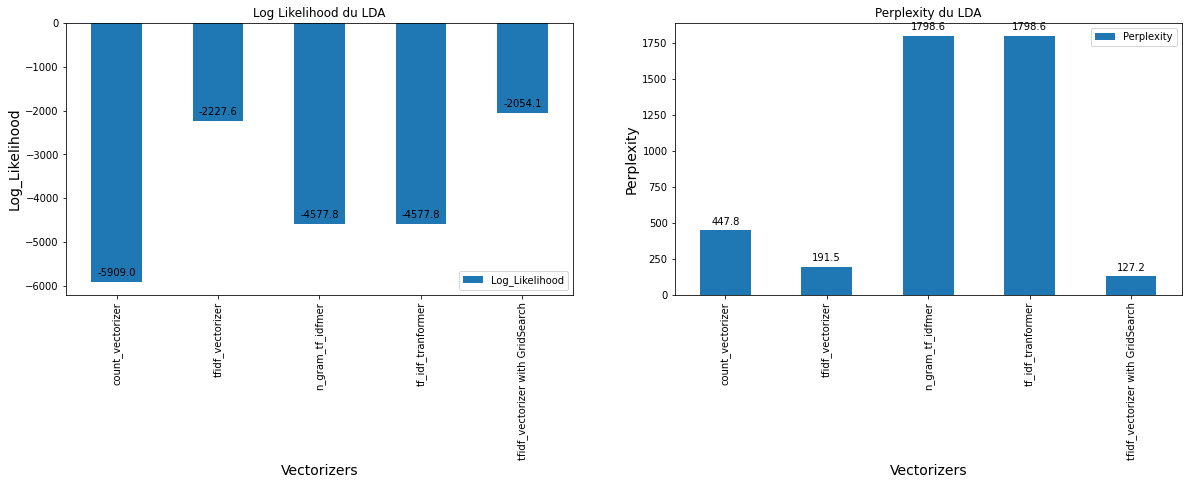

<Figure size 1440x360 with 0 Axes>

In [15]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#Performance after GridSearch

#Add results in dictionaries
dict_Likelihood['tfidf_vectorizer with GridSearch'] = best_lda_model.score(feat_test) #after training the model
dict_Perplexity['tfidf_vectorizer with GridSearch'] = best_lda_model.perplexity(feat_test)

#Dictionaries to dataframe
df_Likelihood = pd.DataFrame.from_dict(dict_Likelihood, orient='index',columns=["Log_Likelihood"])
df_Perplexity= pd.DataFrame.from_dict(dict_Perplexity, orient='index',columns=["Perplexity"])

plt.rcParams['figure.figsize'] = (20, 5) #(L,h)
figure, axes = plt.subplots(1, 2)

ax1 = df_Likelihood.plot(ax=axes[0], kind='bar')
ax1.set_title("Log Likelihood du LDA")
ax1.set_xlabel("Vectorizers", size=14)
ax1.set_ylabel("Log_Likelihood", size=14)

ax2 = df_Perplexity.plot(ax=axes[1], kind='bar')
ax2.set_title("Perplexity du LDA")
ax2.set_xlabel("Vectorizers", size=14)
ax2.set_ylabel("Perplexity", size=14)

 
for p in ax1.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')   

plt.show()

plt.figure();

**<font color="green">La GridSearch a bien fait augmenté la performance du modèle pour le tf-idf vectorizer.</font>**

## <font color="#337da4">Création à la main des topics</font>

In [16]:
# Get the top 10 keywords each topic

def show_topics(vectorizer=tfidf_vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(tfidf_vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = show_topics(vectorizer=tfidf_vectorizer,
                             lda_model=best_lda_model, 
                             n_words=10)


# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,application,array,list,web,get,string,use,page,error,view
Topic 1,number,datum,javascript,find,cplusplus,add,base,difference,use,user
Topic 2,image,value,string,base,form,database,php,cplusplus,change,function
Topic 3,net,view,server,form,good,use,create,file,function,database
Topic 4,file,android,create,cdiese,database,difference,table,variable,web,use
Topic 5,iphone,app,page,work,change,good,use,file,add,get
Topic 6,code,function,table,array,use,list,user,string,add,database
Topic 7,get,error,php,make,user,file,android,web,use,change
Topic 8,text,object,array,android,form,function,class,change,image,cplusplus
Topic 9,use,problem,class,window,find,file,net,object,error,create


In [18]:
df_tags = pd.read_csv('100_tags.csv', index_col =False)
df_tags.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Tags
0,59,javascript
1,0,c#
2,126,iphone
3,96,php
4,167,objective-c


In [19]:
top_100_tags = df_tags["Tags"]
top_100_tags = top_100_tags.to_list()  
top_100_tags

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['javascript',
 'c#',
 'iphone',
 'php',
 'objective-c',
 'android',
 'jquery',
 'c++',
 'html',
 'python',
 'cocoa-touch',
 'asp.net',
 'sql',
 'ios',
 '.net',
 'mysql',
 'c',
 'css',
 'database',
 'language-agnostic',
 'sql-server',
 'git',
 'cocoa',
 'regex',
 'windows',
 'ajax',
 'algorithm',
 'homework',
 'iphone-sdk-4.0',
 'oracle',
 'xcode',
 'arrays',
 'performance',
 'multithreading',
 'string',
 'oop',
 'ipad',
 'sqlite',
 'linux',
 'ruby-on-rails',
 'xml',
 'ruby',
 'email',
 'uitableview',
 'eclipse',
 'winforms',
 'terminology',
 'validation',
 'http',
 'vb.net',
 'asp.net-mvc',
 'wpf',
 'facebook',
 'jsp',
 'silverlight',
 'image',
 'version-control',
 'forms',
 'visual-studio-2010',
 'datetime',
 'mac',
 'json',
 'class',
 'error',
 'collections',
 'wcf',
 'design-patterns',
 'php5',
 'browser',
 'perl',
 'zend-framework',
 'codeigniter',
 'r',
 'unit-testing',
 'html5',
 'date',
 'tsql',
 'math',
 'swing',
 'web-development',
 'syntax',
 'excel',
 'api',
 'linq',
 'anim

**Une autre façon d'afficher les topics:**

In [20]:
#10 words
no_top_words = 10
tf_feature_names = tfidf_vectorizer.get_feature_names()

def display_topics(model, feature_names, no_top_words):
    #(model.components_)(10, 29)
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(best_lda_model, tf_feature_names, no_top_words)

Topic 0:
application array list web get string use page error view
Topic 1:
number datum javascript find cplusplus add base difference use user
Topic 2:
image value string base form database php cplusplus change function
Topic 3:
net view server form good use create file function database
Topic 4:
file android create cdiese database difference table variable web use
Topic 5:
iphone app page work change good use file add get
Topic 6:
code function table array use list user string add database
Topic 7:
get error php make user file android web use change
Topic 8:
text object array android form function class change image cplusplus
Topic 9:
use problem class window find file net object error create


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_string = "use problem class windows find file .net object error create"
for element in my_string.split():
    if element in top_100_tags:
        print(element)

In [21]:
#Attention ... 
Topics = [
    #0 
    ["arrays", "string", "error", "web-development", "web-services"], 
    
    #1 
    ["javascript", "c++"] , 
    
    #2 
    ["image", "string", "database", "php","c++"],
    
    #3 
    [".net", "database"],
    
    #4 
    ["android", "c#", "database","web-development", "web-services"], 
    
    #5 
    ["iphone"], 
    
    #6 
    ["arrays", "string","database"], 
    
    #7 
    ["error", "php", "android" ,"web-development", "web-services" ], 
    
    #8 
    ["arrays",  "android", "class", "image","c++"], 
    
    #9 
    ["class", "windows" ,".net", "error"]]

df_topic_keywords["Topics"]=Topics
df_topic_keywords

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Topics
Topic 0,application,array,list,web,get,string,use,page,error,view,"[arrays, string, error, web-development, web-s..."
Topic 1,number,datum,javascript,find,cplusplus,add,base,difference,use,user,"[javascript, c++]"
Topic 2,image,value,string,base,form,database,php,cplusplus,change,function,"[image, string, database, php, c++]"
Topic 3,net,view,server,form,good,use,create,file,function,database,"[.net, database]"
Topic 4,file,android,create,cdiese,database,difference,table,variable,web,use,"[android, c#, database, web-development, web-s..."
Topic 5,iphone,app,page,work,change,good,use,file,add,get,[iphone]
Topic 6,code,function,table,array,use,list,user,string,add,database,"[arrays, string, database]"
Topic 7,get,error,php,make,user,file,android,web,use,change,"[error, php, android, web-development, web-ser..."
Topic 8,text,object,array,android,form,function,class,change,image,cplusplus,"[arrays, android, class, image, c++]"
Topic 9,use,problem,class,window,find,file,net,object,error,create,"[class, windows, .net, error]"


In [22]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, feat_test, tfidf_vectorizer, mds='tsne')
panel

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  15.699370
9       0.648955  71.707100       2        1  13.578006
5      71.019684   9.971006       3        1  11.500599
7       3.785981  33.185135       4        1  10.597240
2     -42.666500  -9.222070       5        1  10.477007
1      -3.621689 -43.526516       6        1   9.602287
6      -3.632402  -4.171708       7        1   7.848330
3     -36.584400  35.804413       8        1   7.657124
0      44.391380  50.615383       9        1   7.259587
8      40.235809 -31.591665      10        1   5.780449, topic_info=           Term       Freq      Total Category  logprob  loglift
37          use  31.000000  31.000000  Default  30.0000  30.0000
9          code  19.000000  19.000000  Default  29.0000  29.0000
3   application  14.000000  14.000000  Default  28.0000  28.0000
36         text  11.000000  11.000000  Default  27.0000  27.0000
29       object  11.000000  11.000000  Default  26.0000  26.0000
20          get  13.000000  13.000000  Default  25.0000  25.0000
16         file  16.000000  16.000000  Default  24.0000  24.0000
19     function  11.000000  11.000000  Default  23.0000  23.0000
22        image  12.000000  12.000000  Default  22.0000  22.0000
39        value  12.000000  12.000000  Default  21.0000  21.0000
34       string  11.000000  11.000000  Default  20.0000  20.0000
27          net   9.000000   9.000000  Default  19.0000  19.0000
15        error  11.000000  11.000000  Default  18.0000  18.0000
32      problem  12.000000  12.000000  Default  17.0000  17.0000
23       iphone  10.000000  10.000000  Default  16.0000  16.0000
4         array   8.000000   8.000000  Default  15.0000  15.0000
2           app   9.000000   9.000000  Default  14.0000  14.0000
41         view   7.000000   7.000000  Default  13.0000  13.0000
28       number   8.000000   8.000000  Default  12.0000  12.0000
33       server   7.000000   7.000000  Default  11.0000  11.0000
25         list   7.000000   7.000000  Default  10.0000  10.0000
30         page   8.000000   8.000000  Default   9.0000   9.0000
18         form   6.000000   6.000000  Default   8.0000   8.0000
1       android  10.000000  10.000000  Default   7.0000   7.0000
13        datum   7.000000   7.000000  Default   6.0000   6.0000
31          php   7.000000   7.000000  Default   5.0000   5.0000
44         work   7.000000   7.000000  Default   4.0000   4.0000
26         make   7.000000   7.000000  Default   3.0000   3.0000
24   javascript   6.000000   6.000000  Default   2.0000   2.0000
5          base   6.000000   6.000000  Default   1.0000   1.0000
16         file  16.357512  16.713220   Topic1  -1.4033   1.8300
1       android   9.843482  10.188497   Topic1  -1.9112   1.8171
11       create   8.223543   8.571512   Topic1  -2.0910   1.8101
6        cdiese   6.660622   7.004253   Topic1  -2.3018   1.8012
12     database   6.194584   6.540875   Topic1  -2.3743   1.7972
14   difference   5.243674   5.587734   Topic1  -2.5410   1.7880
35        table   5.007320   5.352613   Topic1  -2.5871   1.7849
40     variable   4.469705   4.814287   Topic1  -2.7007   1.7773
42          web   3.732176   4.865459   Topic1  -2.8810   1.5864
38         user   0.022205   5.299998   Topic1  -8.0054  -3.6236
0           add   0.021955   6.331917   Topic1  -8.0168  -3.8128
10    cplusplus   0.021847   6.375663   Topic1  -8.0217  -3.8246
7        change   0.021869   6.408808   Topic1  -8.0207  -3.8288
17         find   0.022448   6.598954   Topic1  -7.9945  -3.8319
21         good   0.023289   7.219953   Topic1  -7.9578  -3.8851
43       window   0.021842   6.802406   Topic1  -8.0219  -3.8896
24   javascript   0.021830   6.868276   Topic1  -8.0225  -3.8998
18         form   0.021900   6.916086   Topic1  -8.0192  -3.9035
13        datum   0.023012   7.281100   Topic1  -7.9697  -3.9055
5          base   0.021923   6.9547

**Ci-dessus les bars représentent la fréquence de chaque mot apparaissant dans le topic et dans le corpus global.**


## <font color="#337da4">Prediction des Topics</font>

In [23]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

#Tokenizer
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations
        
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
    
    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
    
    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB'])  
    
    # Step 3: Our Vectorize transform
    mytext_4 = tfidf_vectorizer.transform(mytext_3)
    
    # Step 4: Our LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores# Predict the topic

#test predict_topic function
mytext = ["calculate relative time cdiese"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['android', 'create', 'cdiese', 'database', 'difference', 'table', 'variable', 'web', 'use', ['android', 'c#', 'database', 'web-development', 'web-services']]
['android', 'c#', 'database', 'web-development', 'web-services']


In [24]:
#Predict topics of our reviews in the original dataset:

def apply_predict_topic(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return (infer_topic)

print(data_lemmatized.shape)
data_lemmatized["LDA"]= data_lemmatized['Title'].apply(apply_predict_topic)
print(data_lemmatized.shape)
data_lemmatized.head(10)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2002, 1)
(2002, 2)


,Title,LDA
0,calculate age base datetime type birthday,"[image, string, database, php, c++]"
1,calculate relative time cdiese,"[android, c#, database, web-development, web-s..."
2,versione server database,"[.net, database]"
3,make sure email send mark spam,"[error, php, android, web-development, web-ser..."
4,definitive guide form base website authentication,"[image, string, database, php, c++]"
5,use itertool groupby,"[class, windows, .net, error]"
6,well subversion,"[arrays, string, error, web-development, web-s..."
7,add method exist object instance,"[arrays, android, class, image, c++]"
8,good technology podcast,[iphone]
9,learn compiler,"[arrays, string, error, web-development, web-s..."


**<font color="green">La LDA avec tf-IDF donne des résultats encourageant car les Topics trouvés manuellement correspondent avec ceux délà présents pour la plupart. Il propose aussi des topics plus pertinents voir ligne 2. </font>**

In [25]:
#data_lemmatized.to_csv('4.csv',index=False) #['image', 'string', 'database', 'php', 'c++']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font color="#1d479b">Approche combinée: OnevsRest SVC sur LDA</font>

In [26]:
import numpy as np
import matplotlib as plt
import pandas as pd
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from gensim.utils import tokenize

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from nltk.util import ngrams
from gensim.models import word2vec

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
data_lemmatized_svc = data_lemmatized 
print(data_lemmatized_svc.shape)
data_lemmatized_svc = data_lemmatized_svc.dropna(axis=0)
data_lemmatized_svc.head()

(2002, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,LDA
0,calculate age base datetime type birthday,"[image, string, database, php, c++]"
1,calculate relative time cdiese,"[android, c#, database, web-development, web-s..."
2,versione server database,"[.net, database]"
3,make sure email send mark spam,"[error, php, android, web-development, web-ser..."
4,definitive guide form base website authentication,"[image, string, database, php, c++]"


In [29]:
from sklearn.preprocessing import MultiLabelBinarizer

#Dummies for Tags

s = data_lemmatized_svc['LDA']

mlb = MultiLabelBinarizer()
df_y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data_lemmatized.index)

print(df_y.shape)
df_y.head()

(2002, 16)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,android,arrays,c#,c++,class,database,error,image,iphone,javascript,php,string,web-development,web-services,windows
0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0


In [30]:
data_lemmatized2=pd.concat([data_lemmatized_svc["Title"],df_y], axis=1)
print(data_lemmatized2.shape)
data_lemmatized2.head()

(2002, 17)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,.net,android,arrays,c#,c++,class,database,error,image,iphone,javascript,php,string,web-development,web-services,windows
0,calculate age base datetime type birthday,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0
1,calculate relative time cdiese,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0
2,versione server database,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,make sure email send mark spam,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0
4,definitive guide form base website authentication,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0


**<font color="green">La LDA a retenu 16 tags.</font>**

In [31]:
categories = list(data_lemmatized2.iloc[:,1:].columns)

train, test = train_test_split(data_lemmatized2, random_state=42, test_size=0.33, shuffle=True)

X_train = train["Title"]
X_test = test["Title"]

y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(1341,)
(661,)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
X_test

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1404                    break format nsstre multiple line
357                     intellisense text script template
1344    problem post large amount datum web server iphone
913                                   delete post day old
1300             write mysql query look element key array
1284                     integrate api iphone application
947                       return integer objective iphone
1744                                        set size view
66                                  exist function jquery
1056             correct column type zipcode sql database
57                                 performance difference
1042                 cplusplus code compile assembly code
1477                                       install plugin
588      iphone write audio file pick app document folder
378                  rewrite substre filename rewriterule
278                                      notify notifyall
751                   type client server architecture use
130           

## <font color="#337da4">Grid Search sur les vectorizers</font>

In [33]:
estimator = LogisticRegression(solver='sag',random_state=42)

pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
log_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
log_gs.fit(X_train, y_train)

# Best Model
best_model = log_gs.best_estimator_

print("Best Model's Params: ", log_gs.best_params_)
print("Best Mean Accuracy score: ", log_gs.best_score_)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best Mean Accuracy score:  0.5033512733729124


In [421]:
estimator = SVC(random_state=42)



pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
svc_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
svc_gs.fit(X_train, y_train)

# Best Model
best_model2 = svc_gs.best_estimator_

print("Best Model's Params: ", svc_gs.best_params_)
print("Best Mean Accuracy score: ", svc_gs.best_score_)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 1)}
Best Mean Accuracy score:  0.6293652555068523


In [422]:
estimator = MultinomialNB(fit_prior=True, class_prior=None)


pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
multiNB_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
multiNB_gs.fit(X_train, y_train)

# Best Model
best_model3 = multiNB_gs.best_estimator_

print("Best Model's Params: ", multiNB_gs.best_params_)
print("Best Mean Accuracy score: ", multiNB_gs.best_score_)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best Mean Accuracy score:  0.1714975309326971


## <font color="#337da4">7 vectorizers et 3 modèles</font>

"On choisit le modèle **TruncatedSVD** plutôt que l’ACP dont l’implémentation ne supporte pas les features sparses." (Une variables éparse est une variable dont la plupart des valeurs sont nulles. Par exemple, le nombre de mots). 

http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/text_sentiment_wordvec.html

In [34]:
#vectorizers
tf_idf_tranformer = Pipeline([('count', CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                        
                                 #GridSearch: max number of uniq words  
                                 max_features=1000)),
                              
                         ('tfid', TfidfTransformer())])

count_vectorizer = tf_idf_tranformer['count']

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   #GridSearch: max number of uniq words 
                                   max_features=1000, 
                                   use_idf=False)

                                                
n_gram_tf_idfmer1 = make_pipeline(CountVectorizer(
    
    #GridSearch: ngram_range
    ngram_range=(1, 2),                                         
    
    analyzer='word',
    # minimum occurences of a word at leat 10 times
    min_df =10,    
    # remove stop words
    stop_words='english',
    # convert all words to lowercase
    lowercase=True,     
    # # num chars > 2 
    token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
    
    #GridSearch: max number of uniq words                      
    max_features=1000),
                                  TfidfTransformer())

n_gram_tf_idfmer2 = make_pipeline(CountVectorizer(
    
    #GridSearch: ngram_range
    ngram_range=(1, 1),
    
    analyzer='word',
    # minimum occurences of a word at leat 10 times
    min_df =10,    
    # remove stop words
    stop_words='english',
    # convert all words to lowercase
    lowercase=True,     
    # # num chars > 2 
    token_pattern='[a-zA-Z0-9]{2,}',  
    
    #GridSearch: max number of uniq words                      
    max_features=1000),
                                  TfidfTransformer())

count_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                     # minimum occurences of a word at leat 10 times
                                                     min_df =10,    
                                                     # remove stop words
                                                     stop_words='english',
                                                     # convert all words to lowercase
                                                     lowercase=True,     
                                                     # # num chars > 2 
                                                     token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                     
                                                     #GridSearch: max number of uniq words  
                                                     max_features=1000), 
                                     
                                     #n_components must be < n_features= 112
                                     TruncatedSVD(n_components=100)) 

tf_idfmer_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                         # minimum occurences of a word at leat 10 times
                                                         min_df =10,    
                                                         # remove stop words
                                                         stop_words='english',
                                                         # convert all words to lowercase
                                                         lowercase=True,     
                                                         # # num chars > 2 
                                                         token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                         
                                                         #GridSearch: max number of uniq words 
                                                         max_features=1000),
                                         
                                         TfidfTransformer(),
                                         #n_components must be < n_features= 112
                                         TruncatedSVD(n_components=100))



#list of vectorizers
methods = []
methods.append(('tf_idf_tranformer', tf_idf_tranformer))
methods.append(('count_vectorizer', count_vectorizer))
methods.append(('tfidf_vectorizer', tfidf_vectorizer))
methods.append(('n_gram_tf_idfmer1', n_gram_tf_idfmer1))
methods.append(('n_gram_tf_idfmer2', n_gram_tf_idfmer2))
methods.append(('count_SVD_vectorizer', count_SVD_vectorizer))
methods.append(('tf_idfmer_SVD_vectorizer', tf_idfmer_SVD_vectorizer))

#list of models
models =[]                                                  
models.append(('LogisticReg', OneVsRestClassifier(LogisticRegression(solver='sag',random_state=42), n_jobs=1)))
models.append(('SVC',  OneVsRestClassifier(SVC(random_state=42), n_jobs=1)  ))
#Negative values in data passed to MultinomialNB (input X) for SVD
models.append(('MultinomialNB', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=1) ))

             
              
model_dict={}
score_dict = {}


for name_model, model in models: 
    #Initialize the dict
    score_dict = {}
    for name_vectorizer, vectorizer in methods:
        
        
        #y_train_predict
        vectorizer.fit(X_train)
        feat_train = vectorizer.transform(X_train)
        #y_test_predict
        feat_test = vectorizer.transform(X_test)
        
        # fit model with y_train_predict
        #print(model)
        model.fit(feat_train, y_train)
        
        
        #score with y_test_predict
        score_dict[name_vectorizer]= model.score(feat_test, y_test) #not stable score
        
        model_dict[name_model] = score_dict
    

model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter

ValueError: Negative values in data passed to MultinomialNB (input X)

In [35]:
model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'LogisticReg': {'tf_idf_tranformer': 0.6611195158850227,
  'count_vectorizer': 0.7488653555219364,
  'tfidf_vectorizer': 0.773071104387292,
  'n_gram_tf_idfmer1': 0.6611195158850227,
  'n_gram_tf_idfmer2': 0.6611195158850227,
  'count_SVD_vectorizer': 0.7518910741301059,
  'tf_idfmer_SVD_vectorizer': 0.659606656580938},
 'SVC': {'tf_idf_tranformer': 0.7291981845688351,
  'count_vectorizer': 0.7609682299546142,
  'tfidf_vectorizer': 0.8260211800302572,
  'n_gram_tf_idfmer1': 0.7276853252647504,
  'n_gram_tf_idfmer2': 0.7291981845688351,
  'count_SVD_vectorizer': 0.789712556732224,
  'tf_idfmer_SVD_vectorizer': 0.75642965204236},
 'MultinomialNB': {'tf_idf_tranformer': 0.3434190620272315,
  'count_vectorizer': 0.4266263237518911,
  'tfidf_vectorizer': 0.34493192133131617,
  'n_gram_tf_idfmer1': 0.34190620272314676,
  'n_gram_tf_idfmer2': 0.3434190620272315}}

## <font color="#337da4">Words2vec </font>

In [36]:
#Features
def get_vect(word, model):
    #if a word is not present
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))
    
#Pour chaque phrase, on fait la somme des vecteurs 
#associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire. 
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from gensim.utils import tokenize
from gensim.models import word2vec



sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train]
#sentance[0]

model = word2vec.Word2Vec(sentance, \
                          #from 1000 to 100 features
                          vector_size=100, \
                          window=20,\
                          min_count=2, \
                          workers=1)
#model.corpus_count

#try:
    #model.wv['rrrrrrrr']
#except KeyError as e:
    #print(e)
    
#model.save('trained_word2vec.bin')



#data_vectorized
wv_train_feat = word2vec_features(X_train, model)
wv_test_feat = word2vec_features(X_test, model)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
clf_Log_wv = OneVsRestClassifier(LogisticRegression(solver='sag', random_state=42), n_jobs=1)

clf_Log_wv.fit(wv_train_feat, y_train)
model_dict['LogisticReg']["word2vec"] = clf_Log_wv.score(wv_test_feat, y_test)
model_dict['LogisticReg']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.6611195158850227,
 'count_vectorizer': 0.7488653555219364,
 'tfidf_vectorizer': 0.773071104387292,
 'n_gram_tf_idfmer1': 0.6611195158850227,
 'n_gram_tf_idfmer2': 0.6611195158850227,
 'count_SVD_vectorizer': 0.7518910741301059,
 'tf_idfmer_SVD_vectorizer': 0.659606656580938,
 'word2vec': 0.08169440242057488}

In [39]:
clf_SVC_wv = OneVsRestClassifier(SVC(random_state=42), n_jobs=1)

clf_SVC_wv.fit(wv_train_feat, y_train)
model_dict['SVC']["word2vec"] = clf_SVC_wv.score(wv_test_feat, y_test)
model_dict['SVC']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.7291981845688351,
 'count_vectorizer': 0.7609682299546142,
 'tfidf_vectorizer': 0.8260211800302572,
 'n_gram_tf_idfmer1': 0.7276853252647504,
 'n_gram_tf_idfmer2': 0.7291981845688351,
 'count_SVD_vectorizer': 0.789712556732224,
 'tf_idfmer_SVD_vectorizer': 0.75642965204236,
 'word2vec': 0.0}

In [40]:
clf_MultiNB_wv = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=1)

clf_MultiNB_wv.fit(wv_train_feat, y_train)
model_dict['MultinomialNB']["word2vec"] = clf_MultiNB_wv.score(wv_test_feat, y_test)
model_dict['MultinomialNB']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.3434190620272315,
 'count_vectorizer': 0.4266263237518911,
 'tfidf_vectorizer': 0.34493192133131617,
 'n_gram_tf_idfmer1': 0.34190620272314676,
 'n_gram_tf_idfmer2': 0.3434190620272315,
 'word2vec': 0.0}

## <font color="#337da4">Choix du meilleur vectorizer </font>

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


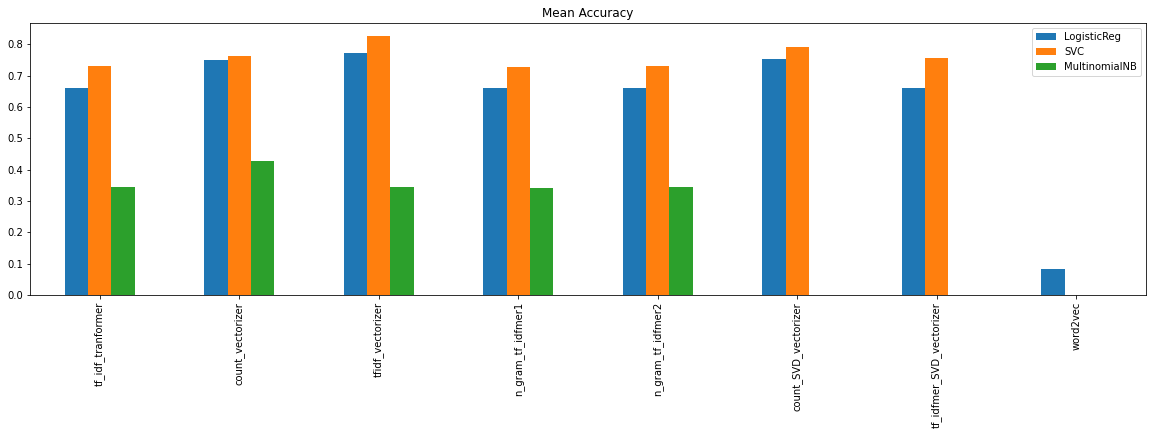

<Figure size 1440x360 with 0 Axes>

In [41]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#figure, axes = plt.subplots(1, 2)
#Mean Accuracy
df_Log_score= pd.DataFrame.from_dict(model_dict['LogisticReg'], orient='index',columns=["LogisticReg"])
df_SVC_score= pd.DataFrame.from_dict(model_dict['SVC'], orient='index',columns=["SVC"])
df_MultiNB_score= pd.DataFrame.from_dict(model_dict['MultinomialNB'], orient='index',columns=["MultinomialNB"])
df_final = pd.concat([df_Log_score, df_SVC_score, df_MultiNB_score], axis=1)


ax1 = df_final.plot( kind='bar')
ax1.set_title("Mean Accuracy")
#ax2 = df_SVC_score.plot(ax=axes[1], kind='bar')
#ax2.set_title("SVC")

plt.figure();

In [42]:
df_final = pd.concat([df_Log_score, df_SVC_score, df_MultiNB_score], axis=1)
df_final.style.highlight_max(axis=0)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LogisticReg,SVC,MultinomialNB
tf_idf_tranformer,0.661120,0.729198,0.343419
count_vectorizer,0.748865,0.760968,0.426626
tfidf_vectorizer,0.773071,0.826021,0.344932
n_gram_tf_idfmer1,0.661120,0.727685,0.341906
n_gram_tf_idfmer2,0.661120,0.729198,0.343419
count_SVD_vectorizer,0.751891,0.789713,nan
tf_idfmer_SVD_vectorizer,0.659607,0.756430,nan
word2vec,0.081694,0.000000,0.000000


**<font color="green">Donc on va prendre SVC avec `tfidf_vectorizer`.</font>**

## <font color="#337da4">GridSearchCV du SVC sur la LDA</font>

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   #GridSearch: max number of uniq words 
                                   max_features=1000, 
                                   use_idf=False)


tfidf_vectorizer.fit(X_train)
feat_train = tfidf_vectorizer.transform(X_train)
feat_test = tfidf_vectorizer.transform(X_test)



estimator = SVC(random_state= 42)
SVC_clf = OneVsRestClassifier(estimator, n_jobs=1)

#params ={'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

params = { 'estimator__C': np.logspace(-3, 3, 7, 10) }


gs = GridSearchCV(SVC_clf, params, cv=10)
gs.fit(feat_train, y_train)#time 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=10,
             estimator=OneVsRestClassifier(estimator=SVC(random_state=42),
                                           n_jobs=1),
             param_grid={'estimator__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

## Mean Accuracy

In [44]:
print("Best Model's Params: ", gs.best_params_)
print("Best Mean Accuracy: ", gs.best_score_)

# Score after training the model
best_SVC_on_lda_model = gs.best_estimator_
best_SVC_on_lda_model.fit(feat_train, y_train)
print("Mean Accuracy on Test Data: ", best_SVC_on_lda_model.score(feat_test, y_test))

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'estimator__C': 10.0}
Best Mean Accuracy:  0.8448922056384743
Mean Accuracy on Test Data:  0.8472012102874432


In [45]:
model_dict['SVC']["tfidf_vectorizer with GridSerach"] = best_SVC_on_lda_model.score(feat_test, y_test)
model_dict['SVC']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.7291981845688351,
 'count_vectorizer': 0.7609682299546142,
 'tfidf_vectorizer': 0.8260211800302572,
 'n_gram_tf_idfmer1': 0.7276853252647504,
 'n_gram_tf_idfmer2': 0.7291981845688351,
 'count_SVD_vectorizer': 0.789712556732224,
 'tf_idfmer_SVD_vectorizer': 0.75642965204236,
 'word2vec': 0.0,
 'tfidf_vectorizer with GridSerach': 0.8472012102874432}

In [212]:
#model_dict['LogisticReg'].pop('tfidf_vectorizer with GridSerach', None)
#model_dict['SVC'].pop( 'count_SVD_vectorizer with GridSerach', None)
#model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


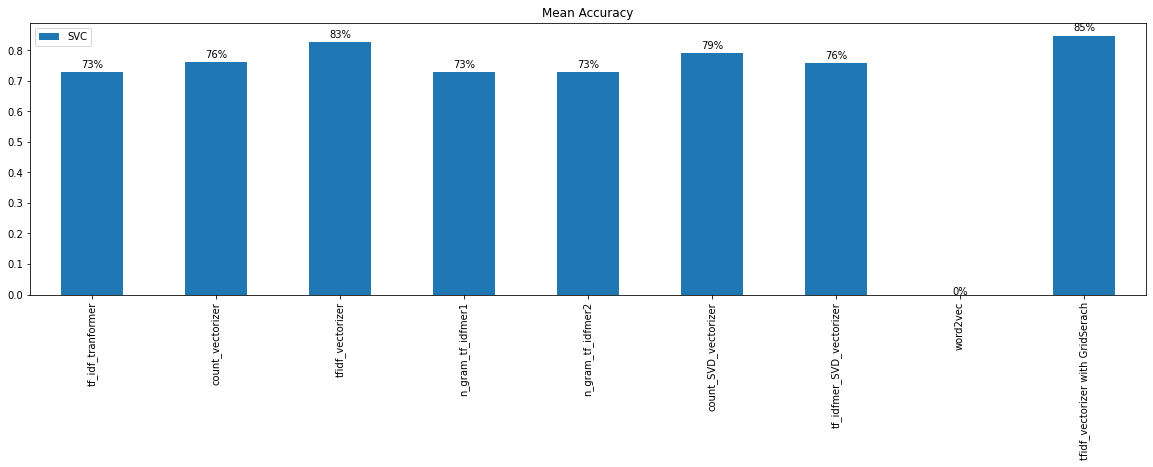

<Figure size 1440x360 with 0 Axes>

In [49]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

df_Accuracy= pd.DataFrame.from_dict(model_dict['SVC'], orient='index',columns=["SVC"])

ax = df_Accuracy.plot(kind='bar')
ax.set_title("Mean Accuracy")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

plt.figure();

## <font color="#337da4">Prédiction et scores sur le jeu de test</font>

In [50]:
#predict  the Topics on Test Data
y_pred = best_SVC_on_lda_model.predict(feat_test)
print(y_pred.shape)
y_pred

(661, 16)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0]])

### f1_score

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="samples")

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8981060375160225

### jaccard_score

In [51]:
df_tags = pd.DataFrame(data=y_pred, columns=categories)
df_tags.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,android,arrays,c#,c++,class,database,error,image,iphone,javascript,php,string,web-development,web-services,windows
0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0


In [53]:
from sklearn.metrics import jaccard_score


dict_jaccard={}

for column in categories:
    dict_jaccard[column] = jaccard_score(y_test[column], df_tags[column])    
dict_jaccard

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'.net': 0.8558558558558559,
 'android': 0.80625,
 'arrays': 0.8741935483870967,
 'c#': 0.7790697674418605,
 'c++': 0.7363636363636363,
 'class': 0.8260869565217391,
 'database': 0.7981651376146789,
 'error': 0.8772378516624041,
 'image': 0.7625,
 'iphone': 0.7333333333333333,
 'javascript': 0.5757575757575758,
 'php': 0.7833333333333333,
 'string': 0.9017341040462428,
 'web-development': 0.8678304239401496,
 'web-services': 0.8678304239401496,
 'windows': 0.8378378378378378}

In [59]:
def j_score(y_true,y_pred):
    
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  
    return  print(jaccard.mean()*100)

j_score(y_test, df_tags)

88.40621472996659


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-0e49c2c5e353>:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

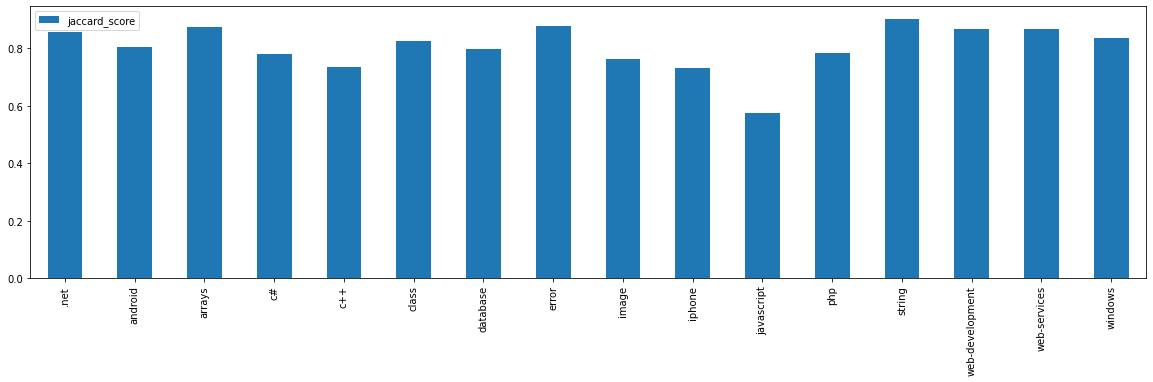

In [60]:
df_jaccard = pd.DataFrame.from_dict(dict_jaccard,orient='index',columns=["jaccard_score"])
df_jaccard.head()
df_jaccard.plot(kind='bar')

In [67]:
#Dummies to series
series_tags = mlb.inverse_transform(y_pred)
print(len(series_tags))
series_tags

661


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('android', 'arrays', 'c++', 'class', 'image'),
 ('iphone',),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('iphone',),
 ('.net', 'database'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('android', 'c#', 'database', 'web-development', 'web-services'),
 ('android', 'c#', 'database', 'web-development', 'web-services'),
 ('arrays', 'database', 'string'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('iphone',),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('.net', 'database'),
 ('arrays', 'error', 'string', 'web-development', 'web-services'),
 ('c++', 'javascript'),
 ('c++', 'javascript'),
 ('arrays', 'error', 'string', 'web-develop

In [68]:
df_test = pd.concat([X_test,y_test], axis = 1)
df_test = df_test.drop(df_test.iloc[:, 1:], axis=1)
df_test.head() 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
1404,break format nsstre multiple line
357,intellisense text script template
1344,problem post large amount datum web server iphone
913,delete post day old
1300,write mysql query look element key array


In [69]:
df_test.loc[df_test.index.isin(data_lemmatized.index), ['LDA']] = data_lemmatized[['LDA']]
print(df_test.shape)
df_test.head(10)

(661, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,LDA
1404,break format nsstre multiple line,"[arrays, string, error, web-development, web-s..."
357,intellisense text script template,"[arrays, android, class, image, c++]"
1344,problem post large amount datum web server iphone,"[.net, database]"
913,delete post day old,"[arrays, string, error, web-development, web-s..."
1300,write mysql query look element key array,"[arrays, string, error, web-development, web-s..."
1284,integrate api iphone application,"[arrays, string, error, web-development, web-s..."
947,return integer objective iphone,[iphone]
1744,set size view,"[.net, database]"
66,exist function jquery,"[arrays, string, database]"
1056,correct column type zipcode sql database,"[android, c#, database, web-development, web-s..."


In [70]:
df_test["SVC_LDA"] = series_tags
print(df_test.shape)
df_test.head(10)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,LDA,SVC_LDA
1404,break format nsstre multiple line,"[arrays, string, error, web-development, web-s...","(arrays, error, string, web-development, web-s..."
357,intellisense text script template,"[arrays, android, class, image, c++]","(android, arrays, c++, class, image)"
1344,problem post large amount datum web server iphone,"[.net, database]","(iphone,)"
913,delete post day old,"[arrays, string, error, web-development, web-s...","(arrays, error, string, web-development, web-s..."
1300,write mysql query look element key array,"[arrays, string, error, web-development, web-s...","(arrays, error, string, web-development, web-s..."
1284,integrate api iphone application,"[arrays, string, error, web-development, web-s...","(arrays, error, string, web-development, web-s..."
947,return integer objective iphone,[iphone],"(iphone,)"
1744,set size view,"[.net, database]","(.net, database)"
66,exist function jquery,"[arrays, string, database]","(arrays, error, string, web-development, web-s..."
1056,correct column type zipcode sql database,"[android, c#, database, web-development, web-s...","(android, c#, database, web-development, web-s..."


In [71]:
df_test.isna().sum()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Title      0
LDA        0
SVC_LDA    0
dtype: int64

In [663]:
df_test.to_csv('5.csv',index=False)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**<font color="green">On remarque que la SVC fonctionne très bien dans la prédiction des tags non supervisés.</font>** 



# <font color="#1d479b">Approches supervisées en OneVsRest</font>

In [62]:
df3 = pd.read_csv('./data/3.csv', index_col =False)
df3 = df3.drop(df3.iloc[:, 1:], axis=1)
df3 = df3.dropna(axis=0)
print(df3.shape)
df3.head()

(2002, 1)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
0,calculate age base datetime type birthday
1,calculate relative time cdiese
2,versione server database
3,make sure email send mark spam
4,definitive guide form base website authentication


In [63]:
df = pd.read_csv('./data/1.csv', index_col =False)
df = df.dropna(axis=0)
df["Tags"] = df["Tags"].astype(str)
print(df.shape)
df.head()

(2015, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags
0,How do I calculate someone's age based on a Da...,<c#><.net><datetime>
1,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...
2,Versioning SQL Server database,<sql-server><database><svn><version-control>
3,How do you make sure email you send programmat...,<email><email-spam>
4,The definitive guide to form-based website aut...,<security><http><authentication><language-agno...


In [64]:
import collections


#tags to list of tags

liste = []

def liste_tags(string_to_change):
    
    for element in string_to_change:
        #drop the tags < >
        test = re.sub('><|<|>', ' ', element)
 
        #string to list of strings
        str_to_list = test.split()
        
        #list of lists of tags
        liste.append(str_to_list)
       
    l = pd.Series(liste)
    #s = s.astype(str)
        
    return l

df["Tags_List"] = liste_tags(df["Tags"])
df = df.drop(labels=['Tags'], axis=1)

#replace value
for a in df["Tags_List"]:
    for n, i in enumerate(a):
        if i == "java":
            a[n] = "javascript"

            
liste = df["Tags_List"].to_list()
tags_flat = [item for sublist in liste for item in sublist]

#Select the 100 most frequent tags
counter=collections.Counter(tags_flat)
dictionary=dict(counter)
df_tags_counts = pd.DataFrame(dictionary.items(), columns=['Tags', 'Counts'])
df_tags_counts = df_tags_counts.sort_values(by=['Counts'], ascending=False)
#100 most frequent tags
tags_to_keep = df_tags_counts.iloc[0:100]
tags_keeped = tags_to_keep["Tags"]
list_tags_keeped =tags_keeped.to_list()
#select tags in the 100 most frequent tags
df['Tags_List'] = [[y for y in x if y in list_tags_keeped] for x in df['Tags_List']]

df.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
0,How do I calculate someone's age based on a Da...,"[c#, .net, datetime]"
1,Calculate relative time in C#,"[c#, datetime]"
2,Versioning SQL Server database,"[sql-server, database, svn, version-control]"
3,How do you make sure email you send programmat...,[email]
4,The definitive guide to form-based website aut...,"[http, language-agnostic]"


In [65]:
df.isna().sum()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Title        0
Tags_List    0
dtype: int64

In [66]:
#Replace the column
df["Title"]= df3["Title"]
df = df.dropna(axis=0)
print(df.shape)
df.head()

(2002, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
0,calculate age base datetime type birthday,"[c#, .net, datetime]"
1,calculate relative time cdiese,"[c#, datetime]"
2,versione server database,"[sql-server, database, svn, version-control]"
3,make sure email send mark spam,[email]
4,definitive guide form base website authentication,"[http, language-agnostic]"


In [67]:
from sklearn.preprocessing import MultiLabelBinarizer

#Dummies for Tags

s = df['Tags_List']

mlb = MultiLabelBinarizer()

fd_y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)
print(fd_y.shape)
fd_y.head()

(2002, 100)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
data_lemmatized=pd.concat([df["Title"],fd_y], axis=1)
print(data_lemmatized.shape)
data_lemmatized.head()

(2002, 101)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,calculate age base datetime type birthday,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,calculate relative time cdiese,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,versione server database,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,make sure email send mark spam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,definitive guide form base website authentication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
data_lemmatized["Title"].isna().sum()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [70]:
#random_state= 42 to have the same output everytime I run


categories = list(data_lemmatized.iloc[:,1:].columns)

train, test = train_test_split(data_lemmatized, random_state=42, test_size=0.33, shuffle=True)

X_train = train["Title"]
X_test = test["Title"]

y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(1341,)
(661,)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#the same split OK
X_test

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1404                    break format nsstre multiple line
357                     intellisense text script template
1344    problem post large amount datum web server iphone
913                                   delete post day old
1300             write mysql query look element key array
1284                     integrate api iphone application
947                       return integer objective iphone
1744                                        set size view
66                                  exist function jquery
1056             correct column type zipcode sql database
57                                 performance difference
1042                 cplusplus code compile assembly code
1477                                       install plugin
588      iphone write audio file pick app document folder
378                  rewrite substre filename rewriterule
278                                      notify notifyall
751                   type client server architecture use
130           

## <font color="#337da4">GridSearchCV sur les vectorizers</font>

In [468]:
estimator = LogisticRegression(solver='sag',random_state=42)

pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
log_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
log_gs.fit(X_train, y_train)

# Best Model
best_model = log_gs.best_estimator_

print("Best Model's Params: ", log_gs.best_params_)
print("Best Mean Accuracy score: ", log_gs.best_score_)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: Conve

Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best Mean Accuracy score:  0.1603201464794984


In [469]:
estimator = SVC(random_state=42)



pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
svc_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
svc_gs.fit(X_train, y_train)

# Best Model
best_model2 = svc_gs.best_estimator_

print("Best Model's Params: ", svc_gs.best_params_)
print("Best Mean Accuracy score: ", svc_gs.best_score_)#time = 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best Mean Accuracy score:  0.18940520446096654


In [675]:
estimator = MultinomialNB(fit_prior=True, class_prior=None)



pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", OneVsRestClassifier(estimator, n_jobs=1))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#GridSearch for tfidf transformers
svc_gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
svc_gs.fit(X_train, y_train)

# Best Model
best_model2 = svc_gs.best_estimator_

print("Best Model's Params: ", svc_gs.best_params_)
print("Best Mean Accuracy score: ", svc_gs.best_score_)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 1000, 'transformer__vect__ngram_range': (1, 2)}
Best Mean Accuracy score:  0.1230316817399989


## <font color="#337da4">7 Vectorizers et 3 modèles</font>

In [72]:
#vectorizers
tf_idf_tranformer = Pipeline([('count', CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                        
                                 #GridSearch: max number of uniq words  
                                 max_features=1000)),
                              
                         ('tfid', TfidfTransformer())])

count_vectorizer = tf_idf_tranformer['count']

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   
                                   #GridSearch: max number of uniq words 
                                   max_features=1000, 
                                   use_idf=False)

                                                
n_gram_tf_idfmer1 = make_pipeline(CountVectorizer(
    
    #GridSearch: ngram_range
    ngram_range=(1, 2),                                         
    
    analyzer='word',
    # minimum occurences of a word at leat 10 times
    min_df =10,    
    # remove stop words
    stop_words='english',
    # convert all words to lowercase
    lowercase=True,     
    # # num chars > 2 
    token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
    
    #GridSearch: max number of uniq words                      
    max_features=1000),
                                  TfidfTransformer())

n_gram_tf_idfmer2 = make_pipeline(CountVectorizer(
    
    #GridSearch: ngram_range
    ngram_range=(1, 1),
    
    analyzer='word',
    # minimum occurences of a word at leat 10 times
    min_df =10,    
    # remove stop words
    stop_words='english',
    # convert all words to lowercase
    lowercase=True,     
    # # num chars > 2 
    token_pattern='[a-zA-Z0-9]{2,}',  
    
    #GridSearch: max number of uniq words                      
    max_features=1000),
                                  TfidfTransformer())

count_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                     # minimum occurences of a word at leat 10 times
                                                     min_df =10,    
                                                     # remove stop words
                                                     stop_words='english',
                                                     # convert all words to lowercase
                                                     lowercase=True,     
                                                     # # num chars > 2 
                                                     token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                     
                                                     #GridSearch: max number of uniq words  
                                                     max_features=1000), 
                                     
                                     #n_components must be < n_features= 112
                                     TruncatedSVD(n_components=100)) 

tf_idfmer_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                         # minimum occurences of a word at leat 10 times
                                                         min_df =10,    
                                                         # remove stop words
                                                         stop_words='english',
                                                         # convert all words to lowercase
                                                         lowercase=True,     
                                                         # # num chars > 2 
                                                         token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                         
                                                         #GridSearch: max number of uniq words 
                                                         max_features=1000),
                                         
                                         TfidfTransformer(),
                                         #n_components must be < n_features= 112
                                         TruncatedSVD(n_components=100))



#list of vectorizers
methods = []
methods.append(('tf_idf_tranformer', tf_idf_tranformer))
methods.append(('count_vectorizer', count_vectorizer))
methods.append(('tfidf_vectorizer', tfidf_vectorizer))
methods.append(('n_gram_tf_idfmer1', n_gram_tf_idfmer1))
methods.append(('n_gram_tf_idfmer2', n_gram_tf_idfmer2))
methods.append(('count_SVD_vectorizer', count_SVD_vectorizer))
methods.append(('tf_idfmer_SVD_vectorizer', tf_idfmer_SVD_vectorizer))

#list of models
models =[]                                                  
models.append(('LogisticReg', OneVsRestClassifier(LogisticRegression(solver='sag',random_state=42), n_jobs=1)))
models.append(('SVC',  OneVsRestClassifier(SVC(random_state=42), n_jobs=1)  ))
#Negative values in data passed to MultinomialNB (input X) for SVD
models.append(('MultinomialNB', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=1) ))

             
              
model_dict={}
score_dict = {}


for name_model, model in models: 
    #Initialize the dict
    score_dict = {}
    for name_vectorizer, vectorizer in methods:
        
        
        #y_train_predict
        vectorizer.fit(X_train)
        feat_train = vectorizer.transform(X_train)
        #y_test_predict
        feat_test = vectorizer.transform(X_test)
        
        # fit model with y_train_predict
        #print(model)
        model.fit(feat_train, y_train)
        
        
        #score with y_test_predict
        score_dict[name_vectorizer]= model.score(feat_test, y_test) #not stable score
        
        model_dict[name_model] = score_dict
    

model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: Conve

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: Conve

ValueError: Negative values in data passed to MultinomialNB (input X)

In [73]:
model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'LogisticReg': {'tf_idf_tranformer': 0.1800302571860817,
  'count_vectorizer': 0.19364599092284418,
  'tfidf_vectorizer': 0.1815431164901664,
  'n_gram_tf_idfmer1': 0.1800302571860817,
  'n_gram_tf_idfmer2': 0.1800302571860817,
  'count_SVD_vectorizer': 0.19213313161875945,
  'tf_idfmer_SVD_vectorizer': 0.1800302571860817},
 'SVC': {'tf_idf_tranformer': 0.20121028744326777,
  'count_vectorizer': 0.19364599092284418,
  'tfidf_vectorizer': 0.1875945537065053,
  'n_gram_tf_idfmer1': 0.19969742813918306,
  'n_gram_tf_idfmer2': 0.20121028744326777,
  'count_SVD_vectorizer': 0.1951588502269289,
  'tf_idfmer_SVD_vectorizer': 0.20121028744326777},
 'MultinomialNB': {'tf_idf_tranformer': 0.17246596066565809,
  'count_vectorizer': 0.19969742813918306,
  'tfidf_vectorizer': 0.1815431164901664,
  'n_gram_tf_idfmer1': 0.17095310136157338,
  'n_gram_tf_idfmer2': 0.17246596066565809}}

## <font color="#337da4">Word2vec </font>

"word2vec est une sorte d’ACP non linéaire en ce sens qu’il réduit les dimensions. (...) word2vec est plus qu’une ACP non linéaire et il prend en compte le contexte."

http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/text_sentiment_wordvec.html#word2vec

In [74]:
from gensim.utils import tokenize
from gensim.models import word2vec


#model
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train]
#sentance[0]
model = word2vec.Word2Vec(sentance, \
                          #Features number
                          vector_size=100, \
                          window=20,\
                          min_count=2, \
                          workers=1)
#model.corpus_count

#try:
    #model.wv['rrrrrrrr']
#except KeyError as e:
    #print(e)
    
model.save('trained_word2vec.bin')

#Features
def get_vect(word, model):
    #if word is not present
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))
    
#Pour chaque phrase, on fait la somme des vecteurs 
#associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire. 
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

#data_vectorized
wv_train_feat = word2vec_features(X_train, model)
wv_test_feat = word2vec_features(X_test, model)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
clf_Log_wv = OneVsRestClassifier(LogisticRegression(solver='sag', random_state=42), n_jobs=1)

clf_Log_wv.fit(wv_train_feat, y_train)
model_dict['LogisticReg']["word2vec"] = clf_Log_wv.score(wv_test_feat, y_test)
model_dict['LogisticReg']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.1800302571860817,
 'count_vectorizer': 0.19364599092284418,
 'tfidf_vectorizer': 0.1815431164901664,
 'n_gram_tf_idfmer1': 0.1800302571860817,
 'n_gram_tf_idfmer2': 0.1800302571860817,
 'count_SVD_vectorizer': 0.19213313161875945,
 'tf_idfmer_SVD_vectorizer': 0.1800302571860817,
 'word2vec': 0.12556732223903178}

In [76]:
clf_SVC_wv = OneVsRestClassifier(SVC(random_state=42), n_jobs=1)

clf_SVC_wv.fit(wv_train_feat, y_train)
model_dict['SVC']["word2vec"] = clf_SVC_wv.score(wv_test_feat, y_test)
model_dict['SVC']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.20121028744326777,
 'count_vectorizer': 0.19364599092284418,
 'tfidf_vectorizer': 0.1875945537065053,
 'n_gram_tf_idfmer1': 0.19969742813918306,
 'n_gram_tf_idfmer2': 0.20121028744326777,
 'count_SVD_vectorizer': 0.1951588502269289,
 'tf_idfmer_SVD_vectorizer': 0.20121028744326777,
 'word2vec': 0.12556732223903178}

In [77]:
clf_MultiNB_wv = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=1)

clf_MultiNB_wv.fit(wv_train_feat, y_train)
model_dict['MultinomialNB']["word2vec"] = clf_SVC_wv.score(wv_test_feat, y_test)
model_dict['MultinomialNB']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.17246596066565809,
 'count_vectorizer': 0.19969742813918306,
 'tfidf_vectorizer': 0.1815431164901664,
 'n_gram_tf_idfmer1': 0.17095310136157338,
 'n_gram_tf_idfmer2': 0.17246596066565809,
 'word2vec': 0.12556732223903178}

## <font color="#337da4">Choix du meilleur vectorizer </font>

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


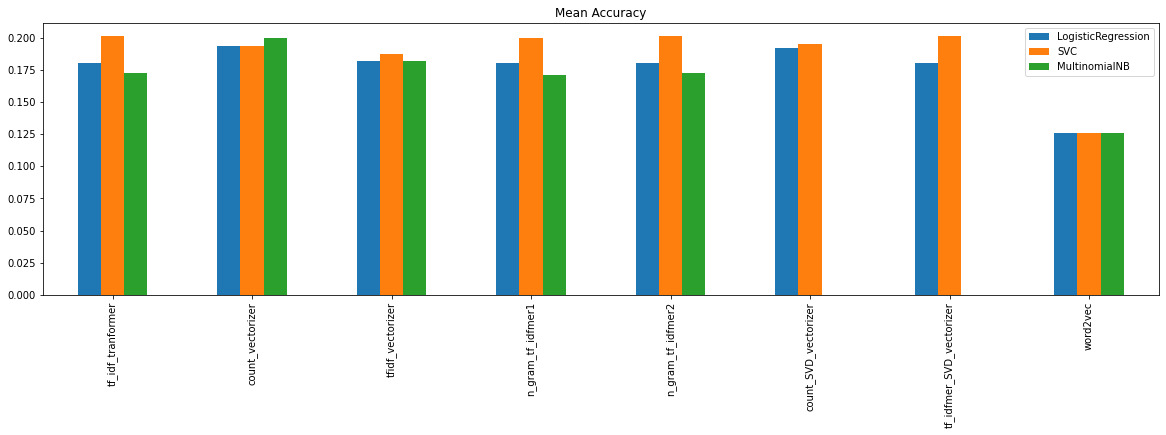

<Figure size 1440x360 with 0 Axes>

In [78]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#plot the mean accuracy on the given test data and labels.= Nb correct pred / total nb of pred
df_log =pd.DataFrame.from_dict(model_dict["LogisticReg"], orient='index',columns=["LogisticRegression"])
df_svc=pd.DataFrame.from_dict(model_dict["SVC"], orient='index',columns=["SVC"])
df_MultinomialNB=pd.DataFrame.from_dict(model_dict["MultinomialNB"], orient='index',columns=["MultinomialNB"])
df_final = pd.concat([df_log,df_svc,df_MultinomialNB], axis=1)


ax = df_final.plot(kind='bar')

plt.title("Mean Accuracy")

plt.figure();

In [79]:
df_log =pd.DataFrame.from_dict(model_dict["LogisticReg"], orient='index',columns=["LogisticRegression"])
df_svc=pd.DataFrame.from_dict(model_dict["SVC"], orient='index',columns=["SVC"])
df_MultinomialNB=pd.DataFrame.from_dict(model_dict["MultinomialNB"], orient='index',columns=["MultinomialNB"])

df_final = pd.concat([df_log,df_svc,df_MultinomialNB], axis=1)
df_final.style.highlight_max(axis=0)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LogisticRegression,SVC,MultinomialNB
tf_idf_tranformer,0.180030,0.201210,0.172466
count_vectorizer,0.193646,0.193646,0.199697
tfidf_vectorizer,0.181543,0.187595,0.181543
n_gram_tf_idfmer1,0.180030,0.199697,0.170953
n_gram_tf_idfmer2,0.180030,0.201210,0.172466
count_SVD_vectorizer,0.192133,0.195159,nan
tf_idfmer_SVD_vectorizer,0.180030,0.201210,nan
word2vec,0.125567,0.125567,0.125567


**<font color="green">Pour la SVC, le `tf_idf_tranformer` donne un meilleure score. Par la suite, on effectue une GridSearch avec le `tf_idf_tranformer`.</font>**


## <font color="#337da4">GridSearchCV du SVC</font>

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

tf_idf_tranformer = Pipeline([('count', CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                        
                                 #GridSearch: max number of uniq words  
                                 max_features=1000)),
                              
                         ('tfid', TfidfTransformer())])


tf_idf_tranformer.fit(X_train)
feat_train = tf_idf_tranformer.transform(X_train)
feat_test = tf_idf_tranformer.transform(X_test)

svc =  OneVsRestClassifier(SVC(random_state=42), n_jobs=1)
params = { 'estimator__C': np.logspace(-3, 3, 7, 10) }

#cv=None, to use the default 5-fold cv
svc_gs = GridSearchCV(svc, params, cv=None)
svc_gs.fit(feat_train, y_train)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=OneVsRestClassifier(estimator=SVC(random_state=42),
                                           n_jobs=1),
             param_grid={'estimator__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

## Mean Accuracy

In [81]:
print("Best Model's Params: ", svc_gs.best_params_)
print("Best  Mean Accuracy: ", svc_gs.best_score_)

# Train the Log Model
best_svc_model = svc_gs.best_estimator_
best_svc_model.fit(feat_train, y_train)
print("Test Mean Accuracy on Test Data: ", best_svc_model.score(feat_test, y_test))

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'estimator__C': 10.0}
Best  Mean Accuracy:  0.20059368584586362
Test Mean Accuracy on Test Data:  0.2178517397881997


In [82]:
model_dict['SVC']["tf_idf_tranformer with GridSaerch"] =best_svc_model.score(feat_test, y_test)
model_dict['SVC']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.20121028744326777,
 'count_vectorizer': 0.19364599092284418,
 'tfidf_vectorizer': 0.1875945537065053,
 'n_gram_tf_idfmer1': 0.19969742813918306,
 'n_gram_tf_idfmer2': 0.20121028744326777,
 'count_SVD_vectorizer': 0.1951588502269289,
 'tf_idfmer_SVD_vectorizer': 0.20121028744326777,
 'word2vec': 0.12556732223903178,
 'tf_idf_tranformer with GridSaerch': 0.2178517397881997}

In [76]:
#final_dict['LogisticRegression'].pop('tf_idf_tranformer with GridSaerch', None)
#final_dict['LogisticRegression']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


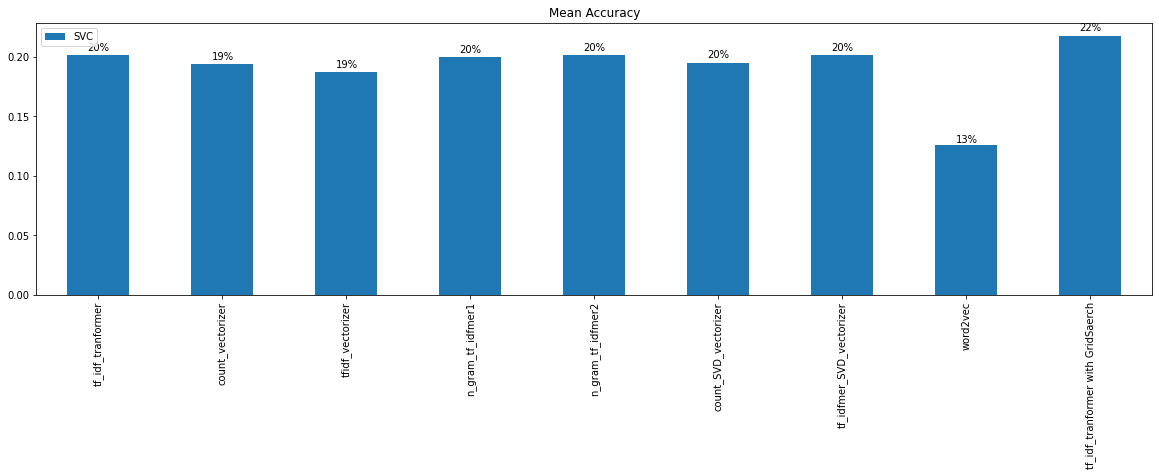

<Figure size 1440x360 with 0 Axes>

In [83]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#plot the mean accuracy on the given test data and labels.= Nb correct pred / total nb of pred
df_log =pd.DataFrame.from_dict(model_dict["SVC"], orient='index',columns=["SVC"])


ax=df_log.plot(kind='bar')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.title("Mean Accuracy")

#ax.get_legend().remove()
plt.show()
plt.figure();

**<font color="green">Avec la GridSearch, la Mean Accuracy est passée de 20% à 22% pour `tf_idf_tranformer`.</font>**


## <font color="#337da4">Prédiction et scores sur le jeu de test</font>

In [84]:
#predict  
y_pred = best_svc_model.predict(feat_test)
y_pred

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### f1_score

In [85]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="samples")

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(


0.1961241985447734

### jaccard_score

In [86]:
from sklearn.metrics import jaccard_score

df_tags = pd.DataFrame(data=y_pred, columns=categories)
dict_jaccard={}
for column in categories:
    
    dict_jaccard[column] = jaccard_score(y_test[column], df_tags[column])
dict_jaccard

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'.net': 0.058823529411764705,
 'ajax': 0.42857142857142855,
 'algorithm': 0.0,
 'android': 0.4222222222222222,
 'animation': 0.0,
 'api': 0.0,
 'arrays': 0.25,
 'asp.net': 0.11538461538461539,
 'asp.net-mvc': 0.5,
 'browser': 0.14285714285714285,
 'c': 0.11764705882352941,
 'c#': 0.2647058823529412,
 'c++': 0.48484848484848486,
 'class': 0.0,
 'cocoa': 0.0625,
 'cocoa-touch': 0.03333333333333333,
 'codeigniter': 0.0,
 'collections': 0.0,
 'css': 0.0,
 'database': 0.05555555555555555,
 'date': 0.0,
 'datetime': 0.16666666666666666,
 'design-patterns': 0.2,
 'django': 0.0,
 'eclipse': 0.0,
 'email': 0.6666666666666666,
 'enums': 0.0,
 'error': 0.0,
 'excel': 0.0,
 'facebook': 0.0,
 'forms': 0.0,
 'git': 0.0,
 'gridview': 0.0,
 'homework': 0.0,
 'html': 0.0,
 'html5': 0.0,
 'http': 0.25,
 'image': 0.3333333333333333,
 'ios': 0.08,
 'ipad': 0.0,
 'iphone': 0.3055555555555556,
 'iphone-sdk-3.0': 0.0,
 'iphone-sdk-4.0': 0.0,
 'javascript': 0.2184873949579832,
 'jquery': 0.23333333333333334,

In [87]:
df_tags = pd.DataFrame(data=y_pred, columns=categories)
df_tags.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
def j_score(y_true,y_pred):
    
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  
    return  print(jaccard.mean()*100)

j_score(y_test, df_tags)

19.431372549019603


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-88-5785c9834d6c>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

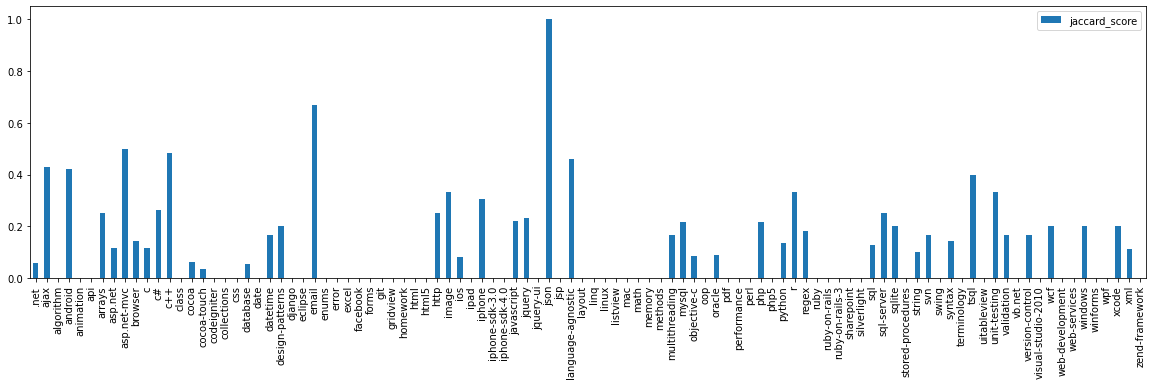

In [89]:
df_jaccard = pd.DataFrame.from_dict(dict_jaccard,orient='index',columns=["jaccard_score"])
df_jaccard.head()

df_jaccard.plot(kind='bar')

In [102]:
#Dummies to series
series_tags = mlb.inverse_transform(y_pred)
print(len(series_tags))
series_tags

661


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(),
 (),
 ('iphone',),
 (),
 (),
 ('iphone',),
 ('cocoa-touch', 'iphone', 'objective-c'),
 (),
 ('javascript', 'jquery'),
 ('database', 'sql', 'sql-server'),
 (),
 ('c++',),
 (),
 ('iphone',),
 (),
 (),
 (),
 (),
 ('javascript',),
 ('ios', 'objective-c'),
 (),
 ('python', 'syntax'),
 ('c',),
 (),
 (),
 (),
 ('php',),
 (),
 (),
 ('c#',),
 ('iphone',),
 ('c++', 'homework'),
 ('javascript', 'xml'),
 (),
 ('mysql',),
 (),
 ('android',),
 (),
 ('c', 'homework'),
 ('javascript',),
 ('javascript',),
 ('animation', 'javascript'),
 ('javascript',),
 (),
 (),
 (),
 ('cocoa', 'mac'),
 ('asp.net', 'asp.net-mvc'),
 ('javascript',),
 (),
 (),
 ('c++',),
 (),
 (),
 ('.net', 'c#', 'linq'),
 (),
 (),
 (),
 (),
 ('python', 'syntax'),
 ('objective-c',),
 (),
 (),
 (),
 (),
 (),
 ('jquery',),
 (),
 (),
 ('ruby', 'ruby-on-rails-3'),
 (),
 (),
 (),
 ('php',),
 (),
 (),
 ('php',),
 ('iphone',),
 (),
 ('cocoa-touch', 'ios'),
 ('python', 'windows'),
 (),
 (),
 (),
 ('c#', 'winforms'),
 ('database', 'image'),


In [103]:
df_test = pd.concat([X_test,y_test], axis = 1)
df_test = df_test.drop(df_test.iloc[:, 1:], axis=1)
df_test.head() 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
1404,break format nsstre multiple line
357,intellisense text script template
1344,problem post large amount datum web server iphone
913,delete post day old
1300,write mysql query look element key array


In [104]:
df_test.loc[df_test.index.isin(df.index), ['Tags_List']] = df[['Tags_List']]
print(df_test.shape)
df_test.head(10)

(661, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
1404,break format nsstre multiple line,"[iphone, objective-c, cocoa]"
357,intellisense text script template,"[jquery, html, visual-studio-2010]"
1344,problem post large amount datum web server iphone,"[iphone, web-services]"
913,delete post day old,[sql]
1300,write mysql query look element key array,"[php, mysql]"
1284,integrate api iphone application,[iphone]
947,return integer objective iphone,[]
1744,set size view,"[objective-c, ios]"
66,exist function jquery,"[javascript, jquery]"
1056,correct column type zipcode sql database,[]


In [105]:
df_test["SVC_on_Tags_List"] = series_tags

print(df_test.shape)
df_test.head(20)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List,SVC_on_Tags_List
1404,break format nsstre multiple line,"[iphone, objective-c, cocoa]",()
357,intellisense text script template,"[jquery, html, visual-studio-2010]",()
1344,problem post large amount datum web server iphone,"[iphone, web-services]","(iphone,)"
913,delete post day old,[sql],()
1300,write mysql query look element key array,"[php, mysql]",()
1284,integrate api iphone application,[iphone],"(iphone,)"
947,return integer objective iphone,[],"(cocoa-touch, iphone, objective-c)"
1744,set size view,"[objective-c, ios]",()
66,exist function jquery,"[javascript, jquery]","(javascript, jquery)"
1056,correct column type zipcode sql database,[],"(database, sql, sql-server)"


**<font color="green">Le score indique environ 22% de Mean Accuracy, cela laisse apparaître des prédictions nulles. Toutefois, la SVC prédit des Tags qui initialement étaient absents.</font>**

In [106]:
df_test.to_csv('6.csv',index=False)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font color="#1d479b">Approche supervisée en multi-outputs</font>

In [90]:
import numpy as np

from sklearn.multioutput import MultiOutputClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print(df.shape)
df.head()

(2002, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
0,calculate age base datetime type birthday,"[c#, .net, datetime]"
1,calculate relative time cdiese,"[c#, datetime]"
2,versione server database,"[sql-server, database, svn, version-control]"
3,make sure email send mark spam,[email]
4,definitive guide form base website authentication,"[http, language-agnostic]"


In [92]:
from sklearn.preprocessing import MultiLabelBinarizer

#Dummies for Tags

s = df['Tags_List']

mlb = MultiLabelBinarizer()
fd_y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)

print(fd_y.shape)
fd_y.head()

(2002, 100)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
data_lemmatized=pd.concat([df["Title"],fd_y], axis=1)
print(data_lemmatized.shape)
data_lemmatized.head()

(2002, 101)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,calculate age base datetime type birthday,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,calculate relative time cdiese,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,versione server database,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,make sure email send mark spam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,definitive guide form base website authentication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
#random_state= 42 to have the same output everytime I run


categories = list(data_lemmatized.iloc[:,1:].columns)

train, test = train_test_split(data_lemmatized, random_state=42, test_size=0.33, shuffle=True)

X_train = train["Title"]
X_test = test["Title"]

y_train = train[categories]
y_test = test[categories]

print(X_train.shape)
print(X_test.shape)

(1341,)
(661,)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
X_test

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1404                    break format nsstre multiple line
357                     intellisense text script template
1344    problem post large amount datum web server iphone
913                                   delete post day old
1300             write mysql query look element key array
1284                     integrate api iphone application
947                       return integer objective iphone
1744                                        set size view
66                                  exist function jquery
1056             correct column type zipcode sql database
57                                 performance difference
1042                 cplusplus code compile assembly code
1477                                       install plugin
588      iphone write audio file pick app document folder
378                  rewrite substre filename rewriterule
278                                      notify notifyall
751                   type client server architecture use
130           

In [97]:
y_test.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
1404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <font color="#337da4">GridSearchCV sur les vectorizers</font>

In [524]:
estimator = KNeighborsClassifier( )

pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", MultiOutputClassifier(estimator))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#y_train_dum = pd.get_dummies(y_train)
#y_test_dum = pd.get_dummies(y_test)




gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
gs.fit(X_train, y_train)

# Best Model
best_model1 = gs.best_estimator_

print("Best Model's Params: ", gs.best_params_)
print("Best Mean Accuracy score: ", gs.best_score_)
#time 2 min

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': False, 'transformer__vect__max_features': 50000, 'transformer__vect__ngram_range': (1, 1)}
Best Mean Accuracy score:  0.17300116517782832


In [525]:
estimator =RandomForestClassifier(n_estimators = 50,max_depth=2, random_state=42)

pipeline = Pipeline([
                    ("transformer", Pipeline([
                        ("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer())])),
                    ("clf", MultiOutputClassifier(estimator))])

parameters = { 
"transformer__vect__max_features": [50000,5000, 3000, 1000],
"transformer__vect__ngram_range": ((1,1),(1,2)),
"transformer__tfidf__use_idf": (True, False)
}


#y_train_dum = pd.get_dummies(y_train)
#y_test_dum = pd.get_dummies(y_test)
        
gs = GridSearchCV(pipeline, param_grid = parameters, scoring = "accuracy")
gs.fit(X_train, y_train)

# Best Model
best_model2 = gs.best_estimator_

print("Best Model's Params: ", gs.best_params_)
print("Best Mean Accuracy score: ", gs.best_score_)
#time 10min

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'transformer__tfidf__use_idf': True, 'transformer__vect__max_features': 50000, 'transformer__vect__ngram_range': (1, 1)}
Best Mean Accuracy score:  0.10962103978250015


## <font color="#337da4"> 7 vectorizers et 4 modèles</font>

**Attention ici, il faudra lancer deux fois la boucle ci-dessous. Une fois pour use_idf = True et une fois pour use_idf = False.**

In [103]:
#vectorizers
tf_idf_tranformer = Pipeline([('count', CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                 
                                  #GridSearch: max number of uniq words 
                                  max_features=50000)),
                              
                         ('tfid', TfidfTransformer())])

count_vectorizer = tf_idf_tranformer['count']

#Max_df=0.9 will remove words that appear in more than 90% of the reviews.
#Min_df=25 will remove words that appear in less than 25 reviews. 
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
                                   min_df =25, 
                                   
                                   #GridSearch: max number of uniq words 
                                   max_features=50000, 
                                   
                                   use_idf=True)


n_gram_tf_idfmer1 = make_pipeline(CountVectorizer(ngram_range=(1, 2),
                                                 analyzer='word',
                                                 # minimum occurences of a word at leat 10 times
                                                 min_df =10,    
                                                 # remove stop words
                                                 stop_words='english',
                                                 # convert all words to lowercase
                                                 lowercase=True,     
                                                 # # num chars > 2 
                                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                  
                                                 #GridSearch: max number of uniq words 
                                                  max_features=50000),
                                  TfidfTransformer())

n_gram_tf_idfmer2 = make_pipeline(CountVectorizer(ngram_range=(1, 1),
                                                 analyzer='word',
                                                 # minimum occurences of a word at leat 10 times
                                                 min_df =10,    
                                                 # remove stop words
                                                 stop_words='english',
                                                 # convert all words to lowercase
                                                 lowercase=True,     
                                                 # # num chars > 2 
                                                 token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                  
                                                 #GridSearch: max number of uniq words 
                                                  max_features=50000),
                                  TfidfTransformer())

count_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                     # minimum occurences of a word at leat 10 times
                                                     min_df =10,    
                                                     # remove stop words
                                                     stop_words='english',
                                                     # convert all words to lowercase
                                                     lowercase=True,     
                                                     # # num chars > 2 
                                                     token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                     
                                                     #GridSearch: max number of uniq words 
                                                      max_features=50000), 
                                     
                                     #n_components must be < n_features= 112
                                     TruncatedSVD(n_components=100)) 

tf_idfmer_SVD_vectorizer = make_pipeline(CountVectorizer(analyzer='word',
                                                         # minimum occurences of a word at leat 10 times
                                                         min_df =10,    
                                                         # remove stop words
                                                         stop_words='english',
                                                         # convert all words to lowercase
                                                         lowercase=True,     
                                                         # # num chars > 2 
                                                         token_pattern='[a-zA-Z0-9]{2,}',  # num chars > 3 
                                                         
                                                         #GridSearch: max number of uniq words 
                                                         max_features=50000),
                                         TfidfTransformer(),
                                         #n_components must be < n_features= 112
                                         TruncatedSVD(n_components=100))



#list of vectorizers
methods = []
methods.append(('tf_idf_tranformer', tf_idf_tranformer))
methods.append(('count_vectorizer', count_vectorizer))
methods.append(('tfidf_vectorizer', tfidf_vectorizer))
methods.append(('n_gram_tf_idfmer1', n_gram_tf_idfmer1))
methods.append(('n_gram_tf_idfmer2', n_gram_tf_idfmer2))
methods.append(('count_SVD_vectorizer', count_SVD_vectorizer))
methods.append(('tf_idfmer_SVD_vectorizer', tf_idfmer_SVD_vectorizer))

#list of models
models =[]
#models.append(('GaussNB', GaussianNB()))   
models.append(('RandomForest', RandomForestClassifier(n_estimators = 100 ,max_depth=2, random_state=42)))
#models.append(('KNN', KNeighborsClassifier())) 
#models.append(('MultiNB', MultinomialNB())) 
#> Negative values in data passed to MultinomialNB (input X) with count_SVD_vectorizer
#for SVD_vectorizer


#model_dict={}
#score_dict = {}



for name_model, model in models: 
    #Initialize the dict
    score_dict = {}
    for name_vectorizer, vectorizer in methods:
        
        
        #y_train_predict
        #print(vectorizer)
        vectorizer.fit(X_train)
        #X
        
        if vectorizer not in [count_SVD_vectorizer,tf_idfmer_SVD_vectorizer]: 
            feat_train = vectorizer.transform(X_train)
            feat_train = feat_train.toarray()
            feat_test = vectorizer.transform(X_test)
            feat_test = feat_test.toarray()
        
            
            # fit model with y_train_predict
            #print(model)
            clf = MultiOutputClassifier(model)
            clf.fit(feat_train, y_train)
            
            
            #score with y_test_predict
            score_dict[name_vectorizer]= clf.score(feat_test, y_test) 
            #> "ValueError: The number of outputs of Y for fit 145 and score 79 should be same"
            #it means that dim(y_train_dum) .fit ==  and dim(y_test_dum) for .score 
            #so has to be y_train_dum
            model_dict[name_model] = score_dict
        
        #here no need to .toarray()
        else :
            feat_train = vectorizer.transform(X_train)
            feat_test = vectorizer.transform(X_test)
            

            clf = MultiOutputClassifier(model)
            clf.fit(feat_train, y_train)
            
            
            #score GaussNB >  mean accuracy
            #score RandomForest > mean accuracy
            #score KNN > mean accuracy 

            score_dict[name_vectorizer]= clf.score(feat_test, y_test) 
            
            model_dict[name_model] = score_dict
    

model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'GaussNB': {'tf_idf_tranformer': 0.01059001512859304,
  'count_vectorizer': 0.01059001512859304,
  'tfidf_vectorizer': 0.0,
  'n_gram_tf_idfmer1': 0.01059001512859304,
  'n_gram_tf_idfmer2': 0.01059001512859304,
  'count_SVD_vectorizer': 0.01664145234493192,
  'tf_idfmer_SVD_vectorizer': 0.01361573373676248,
  'word2vec': 0.12556732223903178},
 'KNN': {'tf_idf_tranformer': 0.16187594553706505,
  'count_vectorizer': 0.17246596066565809,
  'tfidf_vectorizer': 0.16338880484114976,
  'n_gram_tf_idfmer1': 0.16036308623298035,
  'n_gram_tf_idfmer2': 0.16187594553706505,
  'count_SVD_vectorizer': 0.17851739788199697,
  'tf_idfmer_SVD_vectorizer': 0.17549167927382753},
 'MultiNB': {'tf_idf_tranformer': 0.17246596066565809,
  'count_vectorizer': 0.19969742813918306,
  'tfidf_vectorizer': 0.1815431164901664,
  'n_gram_tf_idfmer1': 0.17095310136157338,
  'n_gram_tf_idfmer2': 0.17246596066565809},
 'RandomForest': {'tf_idf_tranformer': 0.12556732223903178,
  'count_vectorizer': 0.1255673222390317

In [104]:
model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'GaussNB': {'tf_idf_tranformer': 0.01059001512859304,
  'count_vectorizer': 0.01059001512859304,
  'tfidf_vectorizer': 0.0,
  'n_gram_tf_idfmer1': 0.01059001512859304,
  'n_gram_tf_idfmer2': 0.01059001512859304,
  'count_SVD_vectorizer': 0.01664145234493192,
  'tf_idfmer_SVD_vectorizer': 0.01361573373676248,
  'word2vec': 0.12556732223903178},
 'KNN': {'tf_idf_tranformer': 0.16187594553706505,
  'count_vectorizer': 0.17246596066565809,
  'tfidf_vectorizer': 0.16338880484114976,
  'n_gram_tf_idfmer1': 0.16036308623298035,
  'n_gram_tf_idfmer2': 0.16187594553706505,
  'count_SVD_vectorizer': 0.17851739788199697,
  'tf_idfmer_SVD_vectorizer': 0.17549167927382753},
 'MultiNB': {'tf_idf_tranformer': 0.17246596066565809,
  'count_vectorizer': 0.19969742813918306,
  'tfidf_vectorizer': 0.1815431164901664,
  'n_gram_tf_idfmer1': 0.17095310136157338,
  'n_gram_tf_idfmer2': 0.17246596066565809},
 'RandomForest': {'tf_idf_tranformer': 0.12556732223903178,
  'count_vectorizer': 0.1255673222390317

## <font color="#337da4">Words2vec</font>

In [105]:
from gensim.utils import tokenize
from gensim.models import word2vec


#model
sentance = [list(tokenize(s, deacc=True, lower=True)) for s in X_train]
#sentance[0]
model = word2vec.Word2Vec(sentance, \
                          #Features number
                          vector_size=100, \
                          window=20,\
                          min_count=2, \
                          workers=1)
#model.corpus_count

#try:
    #model.wv['rrrrrrrr']
#except KeyError as e:
    #print(e)
    
model.save('trained_word2vec.bin')

#Features
def get_vect(word, model):
    #if word is not present
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))
    
#Pour chaque phrase, on fait la somme des vecteurs 
#associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire. 
def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = np.vstack([sum_vectors(p, model) for p in X])
    return feats

#data_vectorized
wv_train_feat = word2vec_features(X_train, model)
wv_test_feat = word2vec_features(X_test, model)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
GaussNB_wv = MultiOutputClassifier(GaussianNB())

GaussNB_wv.fit(wv_train_feat, y_train)
model_dict['GaussNB']["word2vec"] = GaussNB_wv.score(wv_test_feat, y_test)
model_dict['GaussNB'] 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/naive_bay

{'tf_idf_tranformer': 0.01059001512859304,
 'count_vectorizer': 0.01059001512859304,
 'tfidf_vectorizer': 0.0,
 'n_gram_tf_idfmer1': 0.01059001512859304,
 'n_gram_tf_idfmer2': 0.01059001512859304,
 'count_SVD_vectorizer': 0.01664145234493192,
 'tf_idfmer_SVD_vectorizer': 0.01361573373676248,
 'word2vec': 0.12556732223903178}

In [107]:
RF_wv = RandomForestClassifier(n_estimators = 100 ,max_depth=2, random_state=0)

RF_wv.fit(wv_train_feat, y_train)
model_dict['RandomForest']["word2vec"] = RF_wv.score(wv_test_feat, y_test)
model_dict['RandomForest']  

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.12556732223903178,
 'count_vectorizer': 0.12556732223903178,
 'tfidf_vectorizer': 0.12556732223903178,
 'n_gram_tf_idfmer1': 0.12556732223903178,
 'n_gram_tf_idfmer2': 0.12556732223903178,
 'count_SVD_vectorizer': 0.14523449319213314,
 'tf_idfmer_SVD_vectorizer': 0.14826021180030258,
 'word2vec': 0.12556732223903178}

In [108]:
KNN_wv = KNeighborsClassifier()

KNN_wv.fit(wv_train_feat, y_train)
model_dict['KNN']["word2vec"] = KNN_wv.score(wv_test_feat, y_test)
model_dict['KNN']  

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.16187594553706505,
 'count_vectorizer': 0.17246596066565809,
 'tfidf_vectorizer': 0.16338880484114976,
 'n_gram_tf_idfmer1': 0.16036308623298035,
 'n_gram_tf_idfmer2': 0.16187594553706505,
 'count_SVD_vectorizer': 0.17851739788199697,
 'tf_idfmer_SVD_vectorizer': 0.17549167927382753,
 'word2vec': 0.12556732223903178}

In [109]:
MultinomialNB_wv = MultiOutputClassifier(MultinomialNB(fit_prior=True, class_prior=None))

MultinomialNB_wv.fit(wv_train_feat, y_train)
model_dict['MultiNB']["word2vec"] = KNN_wv.score(wv_test_feat, y_test)
model_dict['MultiNB']  

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.17246596066565809,
 'count_vectorizer': 0.19969742813918306,
 'tfidf_vectorizer': 0.1815431164901664,
 'n_gram_tf_idfmer1': 0.17095310136157338,
 'n_gram_tf_idfmer2': 0.17246596066565809,
 'word2vec': 0.12556732223903178}

## <font color="#337da4">Choix du meilleur vectorizer</font>

In [110]:
model_dict

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'GaussNB': {'tf_idf_tranformer': 0.01059001512859304,
  'count_vectorizer': 0.01059001512859304,
  'tfidf_vectorizer': 0.0,
  'n_gram_tf_idfmer1': 0.01059001512859304,
  'n_gram_tf_idfmer2': 0.01059001512859304,
  'count_SVD_vectorizer': 0.01664145234493192,
  'tf_idfmer_SVD_vectorizer': 0.01361573373676248,
  'word2vec': 0.12556732223903178},
 'KNN': {'tf_idf_tranformer': 0.16187594553706505,
  'count_vectorizer': 0.17246596066565809,
  'tfidf_vectorizer': 0.16338880484114976,
  'n_gram_tf_idfmer1': 0.16036308623298035,
  'n_gram_tf_idfmer2': 0.16187594553706505,
  'count_SVD_vectorizer': 0.17851739788199697,
  'tf_idfmer_SVD_vectorizer': 0.17549167927382753,
  'word2vec': 0.12556732223903178},
 'MultiNB': {'tf_idf_tranformer': 0.17246596066565809,
  'count_vectorizer': 0.19969742813918306,
  'tfidf_vectorizer': 0.1815431164901664,
  'n_gram_tf_idfmer1': 0.17095310136157338,
  'n_gram_tf_idfmer2': 0.17246596066565809,
  'word2vec': 0.12556732223903178},
 'RandomForest': {'tf_idf_tran

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


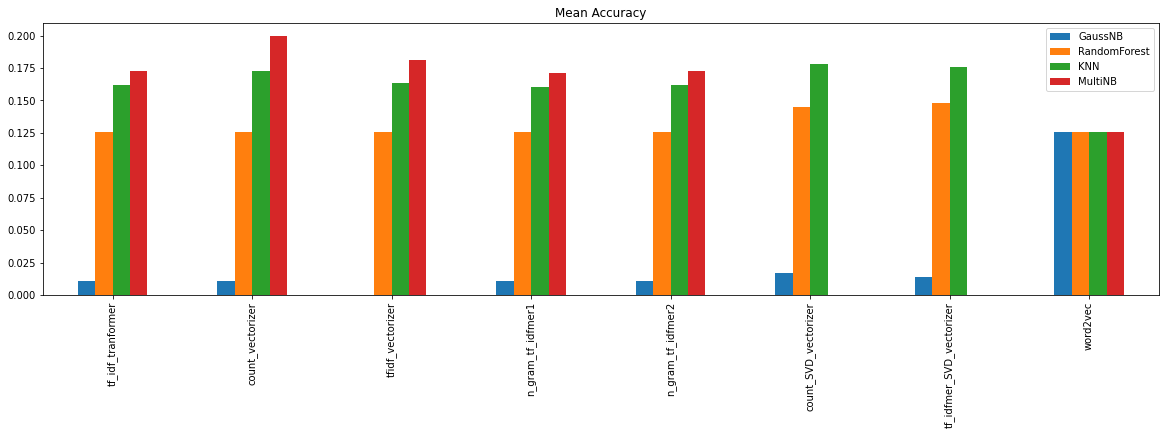

<Figure size 1440x360 with 0 Axes>

In [111]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#plot the mean accuracy on the given test data and labels.
#= Nb correct pred / total nb of pred
df_GaussNB =pd.DataFrame.from_dict(model_dict["GaussNB"], orient='index',columns=["GaussNB"])
df_RandomForest=pd.DataFrame.from_dict(model_dict["RandomForest"], orient='index',columns=["RandomForest"])
df_KNN=pd.DataFrame.from_dict(model_dict["KNN"], orient='index',columns=["KNN"])
df_MultiNB=pd.DataFrame.from_dict(model_dict["MultiNB"], orient='index',columns=["MultiNB"])
df_final = pd.concat([df_GaussNB,df_RandomForest,df_KNN ,df_MultiNB], axis=1)


ax = df_final.plot(kind='bar')

plt.title("Mean Accuracy")

plt.figure();

In [112]:
df_final = pd.concat([df_GaussNB,df_RandomForest,df_KNN,df_MultiNB ], axis=1)
df_final.style.highlight_max(axis=0)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,GaussNB,RandomForest,KNN,MultiNB
tf_idf_tranformer,0.010590,0.125567,0.161876,0.172466
count_vectorizer,0.010590,0.125567,0.172466,0.199697
tfidf_vectorizer,0.000000,0.125567,0.163389,0.181543
n_gram_tf_idfmer1,0.010590,0.125567,0.160363,0.170953
n_gram_tf_idfmer2,0.010590,0.125567,0.161876,0.172466
count_SVD_vectorizer,0.016641,0.145234,0.178517,nan
tf_idfmer_SVD_vectorizer,0.013616,0.148260,0.175492,nan
word2vec,0.125567,0.125567,0.125567,0.125567


**<font color="green">Le meilleur classifieurs parmi les 4 est le MultiNB avec la méthode `count_vectorizer`.</font>**

## <font color="#337da4">No GridSearch du MultiNB</font>

In [114]:
estimator = MultinomialNB(fit_prior=True, class_prior=None)

pipe_MultiNB = Pipeline([('count', CountVectorizer(analyzer='word',
                                 # minimum occurences of a word at leat 10 times
                                 min_df =10,    
                                 # remove stop words
                                 stop_words='english',
                                 # convert all words to lowercase
                                 lowercase=True,     
                                 # # num chars > 2 
                                 token_pattern='[a-zA-Z0-9]{2,}',  
                                               
                                 #GridSearch: max number of uniq words 
                                 max_features=50000)),
        ("clf", MultiOutputClassifier(estimator))])




 
pipe_MultiNB.fit(X_train, y_train)

prediction = pipe_MultiNB.predict(X_test)
print('Mean accuracy is {}'.format(accuracy_score(y_test, prediction)))

#Training accuracy with multioutput classifier
print("Best Accuracy on Train Data: ", pipe_MultiNB.score(X_test, y_test))


Mean accuracy is 0.19969742813918306
Best Accuracy on Train Data:  0.19969742813918306


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Mean Accuracy

In [115]:
model_dict['MultiNB']["count_vectorizer with No GridSearch"] =pipe_MultiNB.score(X_test, y_test)
model_dict['MultiNB']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'tf_idf_tranformer': 0.17246596066565809,
 'count_vectorizer': 0.19969742813918306,
 'tfidf_vectorizer': 0.1815431164901664,
 'n_gram_tf_idfmer1': 0.17095310136157338,
 'n_gram_tf_idfmer2': 0.17246596066565809,
 'word2vec': 0.12556732223903178,
 'count_vectorizer with No GridSearch': 0.19969742813918306}

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


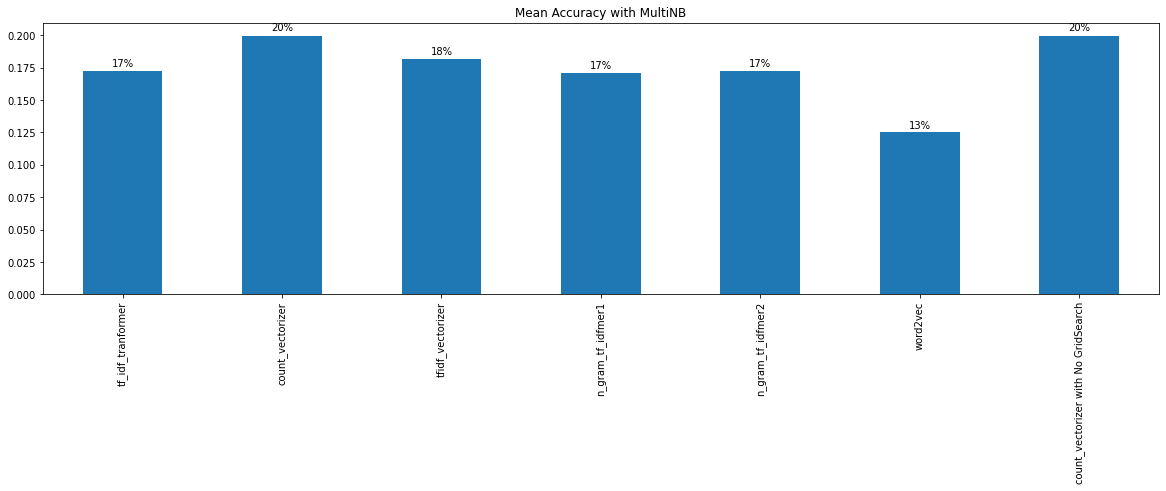

<Figure size 1440x360 with 0 Axes>

In [116]:
plt.rcParams['figure.figsize'] = (20, 5) #(L,h)

#plot the mean accuracy on the given test data and labels.= Nb correct pred / total nb of pred
df_score =pd.DataFrame.from_dict(model_dict["MultiNB"], orient='index',columns=["MultiNB"])


ax=df_score.plot(kind='bar')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.title("Mean Accuracy with MultiNB")

ax.get_legend().remove()
plt.show()
plt.figure();

**<font color="green">On peut remarquer que les scores sont assez similaires au OnevsRest SVC </font>**

## <font color="#337da4">Prédiction des topics</font>

In [117]:
#predict  
y_pred = pipe_MultiNB.predict(X_test)
#y_pred = y_pred.tolist()
y_pred #peux accuracy 


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### f1_score

In [118]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="samples")

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(


0.15633599884734528

### jaccard_score

In [119]:
from sklearn.metrics import jaccard_score

df_tags = pd.DataFrame(data=y_pred, columns=categories)
dict_jaccard={}

for column in categories:
    
    dict_jaccard[column] = jaccard_score(y_test[column], df_tags[column])
dict_jaccard

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'.net': 0.1,
 'ajax': 0.2857142857142857,
 'algorithm': 0.0,
 'android': 0.4634146341463415,
 'animation': 0.0,
 'api': 0.0,
 'arrays': 0.0,
 'asp.net': 0.1111111111111111,
 'asp.net-mvc': 0.5,
 'browser': 0.0,
 'c': 0.0,
 'c#': 0.3090909090909091,
 'c++': 0.42424242424242425,
 'class': 0.0,
 'cocoa': 0.0,
 'cocoa-touch': 0.0,
 'codeigniter': 0.0,
 'collections': 0.0,
 'css': 0.0,
 'database': 0.07142857142857142,
 'date': 0.0,
 'datetime': 0.0,
 'design-patterns': 0.0,
 'django': 0.0,
 'eclipse': 0.0,
 'email': 0.375,
 'enums': 0.0,
 'error': 0.0,
 'excel': 0.0,
 'facebook': 0.0,
 'forms': 0.0,
 'git': 0.0,
 'gridview': 0.0,
 'homework': 0.0,
 'html': 0.0,
 'html5': 0.0,
 'http': 0.0,
 'image': 0.0,
 'ios': 0.15,
 'ipad': 0.0,
 'iphone': 0.328125,
 'iphone-sdk-3.0': 0.0,
 'iphone-sdk-4.0': 0.0,
 'javascript': 0.14285714285714285,
 'jquery': 0.1724137931034483,
 'jquery-ui': 0.0,
 'json': 0.0,
 'jsp': 0.0,
 'language-agnostic': 0.0,
 'layout': 0.0,
 'linq': 0.0,
 'linux': 0.0,
 'listv

In [120]:
df_tags = pd.DataFrame(data=y_pred, columns=categories)
df_tags.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,.net,ajax,algorithm,android,animation,api,arrays,asp.net,asp.net-mvc,browser,c,c#,c++,class,cocoa,cocoa-touch,codeigniter,collections,css,database,date,datetime,design-patterns,django,eclipse,email,enums,error,excel,facebook,forms,git,gridview,homework,html,html5,http,image,ios,ipad,iphone,iphone-sdk-3.0,iphone-sdk-4.0,javascript,jquery,jquery-ui,json,jsp,language-agnostic,layout,linq,linux,listview,mac,math,memory,methods,multithreading,mysql,objective-c,oop,oracle,pdf,performance,perl,php,php5,python,r,regex,ruby,ruby-on-rails,ruby-on-rails-3,sharepoint,silverlight,sql,sql-server,sqlite,stored-procedures,string,svn,swing,syntax,terminology,tsql,uitableview,unit-testing,validation,vb.net,version-control,visual-studio-2010,wcf,web-development,web-services,windows,winforms,wpf,xcode,xml,zend-framework
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
def j_score(y_true,y_pred):
    
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
  
    return  print(jaccard.mean()*100)

j_score(y_test, df_tags)

15.554607508532426


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-5785c9834d6c>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

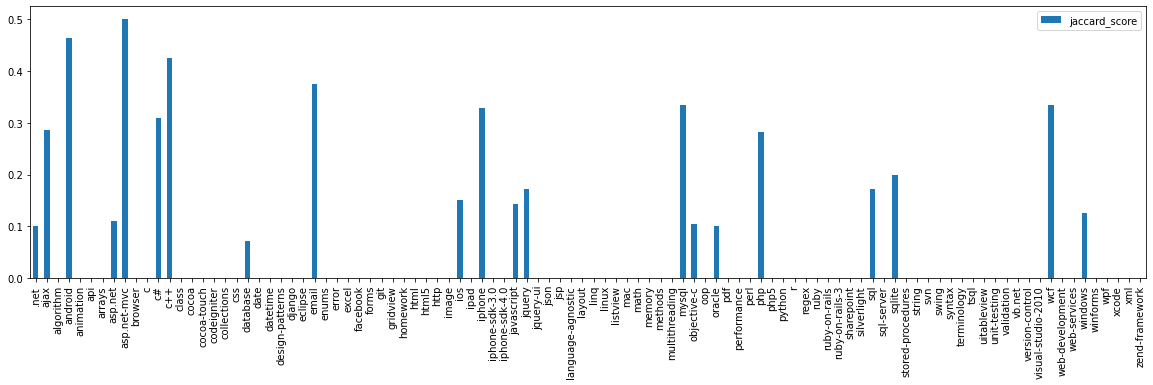

In [122]:
df_jaccard = pd.DataFrame.from_dict(dict_jaccard,orient='index',columns=["jaccard_score"])
df_jaccard.head()
df_jaccard.plot(kind='bar')

In [161]:
#Dummies to series
series_tags = mlb.inverse_transform(y_pred)
print(len(series_tags))
series_tags

661


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(),
 (),
 ('iphone',),
 (),
 ('arrays', 'mysql', 'php'),
 ('iphone',),
 ('cocoa-touch', 'iphone', 'objective-c'),
 (),
 ('jquery',),
 ('sql', 'sql-server'),
 (),
 ('c++',),
 (),
 ('iphone',),
 (),
 (),
 (),
 (),
 ('javascript',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('c#',),
 ('iphone',),
 ('c++',),
 (),
 (),
 ('mysql', 'php'),
 (),
 ('android',),
 (),
 (),
 (),
 ('javascript',),
 ('javascript',),
 (),
 (),
 (),
 (),
 (),
 ('asp.net', 'asp.net-mvc'),
 ('javascript',),
 (),
 (),
 ('c++',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('javascript',),
 (),
 (),
 (),
 ('jquery',),
 (),
 (),
 ('javascript',),
 (),
 (),
 (),
 ('php',),
 (),
 ('python',),
 (),
 (),
 (),
 (),
 ('windows',),
 (),
 (),
 (),
 (),
 (),
 ('android',),
 (),
 ('c#',),
 (),
 (),
 (),
 (),
 ('javascript', 'jquery'),
 ('iphone',),
 (),
 ('c#',),
 (),
 ('mysql',),
 ('c++',),
 (),
 ('c++',),
 ('ios', 'iphone', 'xml'),
 ('php',),
 ('javascript',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('c++',)

In [162]:
df_test = pd.concat([X_test,y_test], axis = 1)
df_test = df_test.drop(df_test.iloc[:, 1:], axis=1)
df_test.head() 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
1404,break format nsstre multiple line
357,intellisense text script template
1344,problem post large amount datum web server iphone
913,delete post day old
1300,write mysql query look element key array


In [163]:
df.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
0,calculate age base datetime type birthday,"[c#, .net, datetime]"
1,calculate relative time cdiese,"[c#, datetime]"
2,versione server database,"[sql-server, database, svn, version-control]"
3,make sure email send mark spam,[email]
4,definitive guide form base website authentication,"[http, language-agnostic]"


In [164]:
df_test.loc[df_test.index.isin(df.index), ['Tags_List']] = df[['Tags_List']]
print(df_test.shape)
df_test.head(10)

(661, 2)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List
1404,break format nsstre multiple line,"[iphone, objective-c, cocoa]"
357,intellisense text script template,"[jquery, html, visual-studio-2010]"
1344,problem post large amount datum web server iphone,"[iphone, web-services]"
913,delete post day old,[sql]
1300,write mysql query look element key array,"[php, mysql]"
1284,integrate api iphone application,[iphone]
947,return integer objective iphone,[]
1744,set size view,"[objective-c, ios]"
66,exist function jquery,"[javascript, jquery]"
1056,correct column type zipcode sql database,[]


In [165]:
df_test["MultiNB_on_Tags_List"] = series_tags

print(df_test.shape)
df_test.head(600)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List,MultiNB_on_Tags_List
1404,break format nsstre multiple line,"[iphone, objective-c, cocoa]",()
357,intellisense text script template,"[jquery, html, visual-studio-2010]",()
1344,problem post large amount datum web server iphone,"[iphone, web-services]","(iphone,)"
913,delete post day old,[sql],()
1300,write mysql query look element key array,"[php, mysql]","(arrays, mysql, php)"
1284,integrate api iphone application,[iphone],"(iphone,)"
947,return integer objective iphone,[],"(cocoa-touch, iphone, objective-c)"
1744,set size view,"[objective-c, ios]",()
66,exist function jquery,"[javascript, jquery]","(jquery,)"
1056,correct column type zipcode sql database,[],"(sql, sql-server)"


In [166]:
df_test.to_csv("7.csv",index=False)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# <font color="#1d479b">Analyse critiques des différentes approches</font>

## <font color="#337da4">Récapitulatif des résultats

**Approche Supervisée LDA**

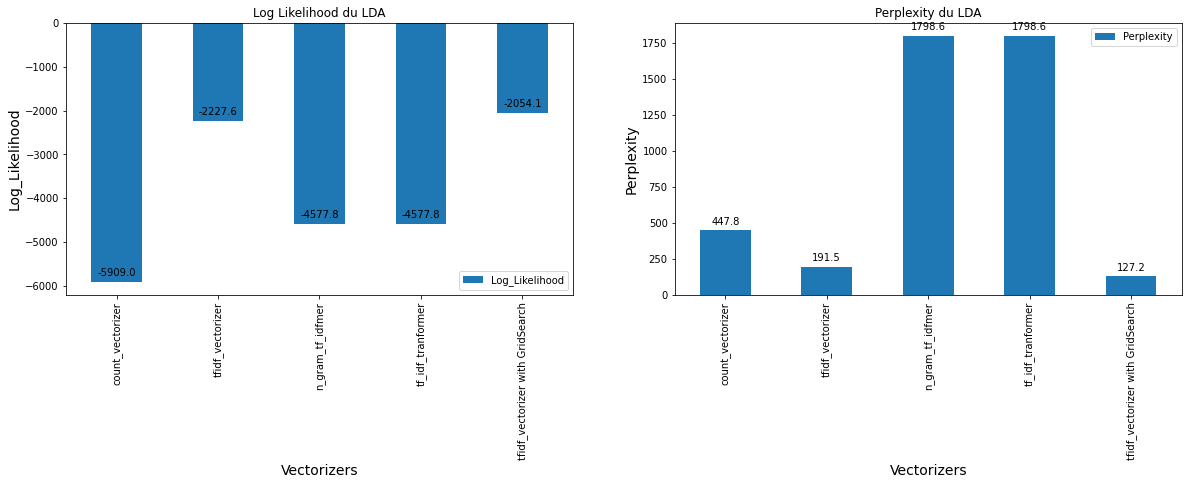

**Approche combinée OneVsRest  SVC sur la LDA**

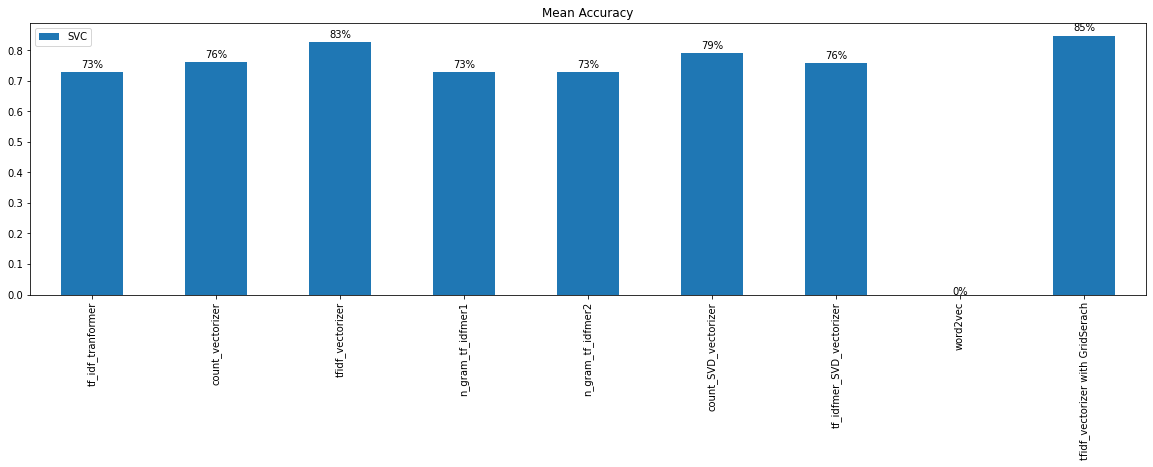
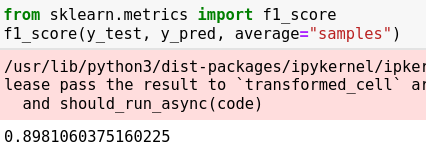

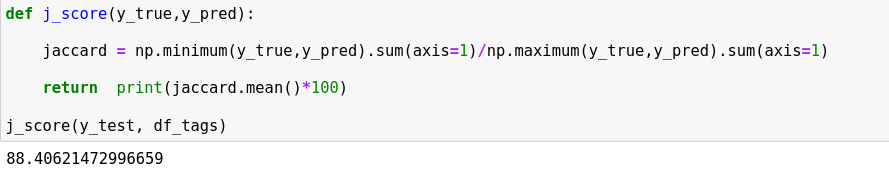

**Approche supervisée OneVsRest SVC**

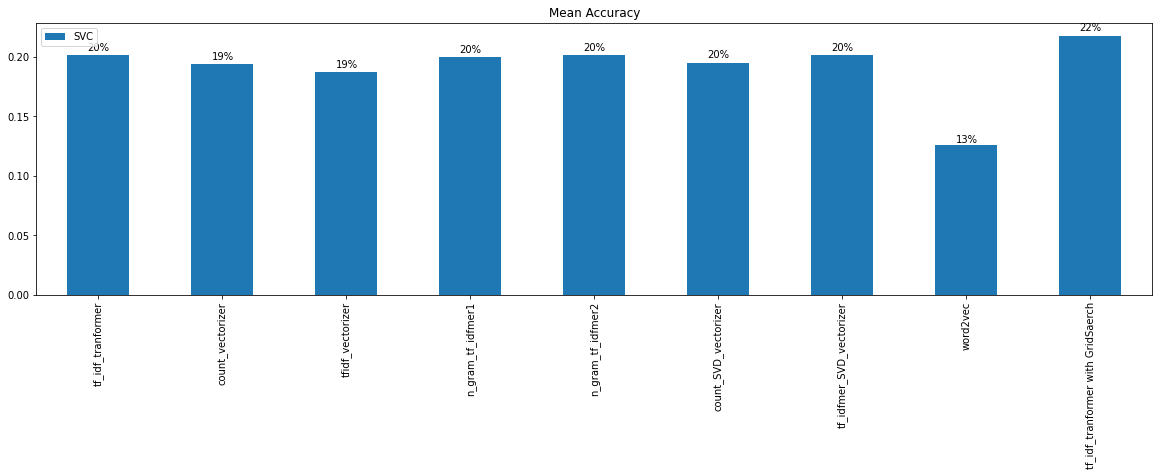

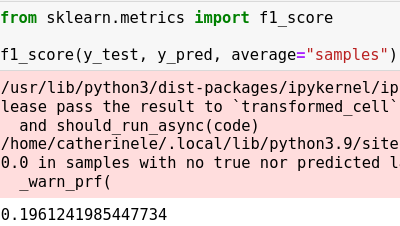

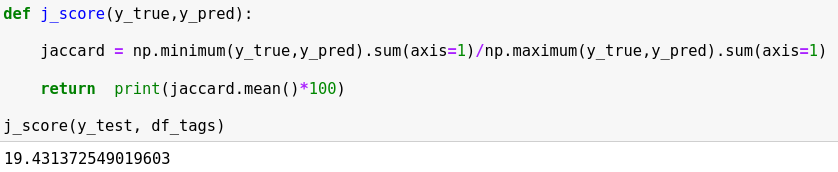

**Approche supervisée Multi-outputs MultinomialNB**

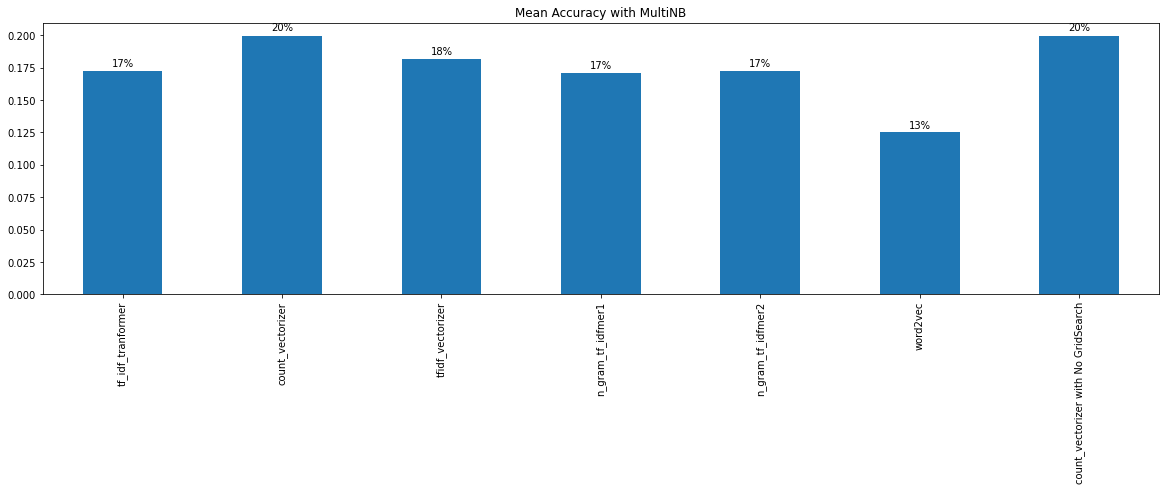
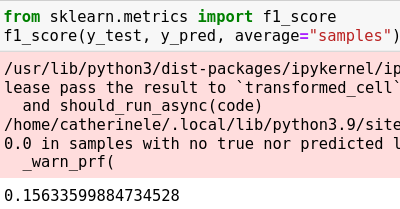
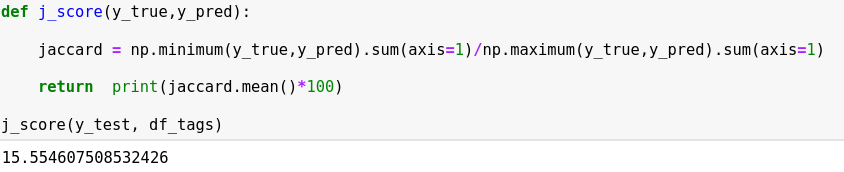

**Les modèles par ordre croissant dans leurs performances: \
Multi-outputs MultinomialNB\
OneVsRest SVC \
OneVsRest SVC sur la LDA**


**La LDA permet de créer manuellement les tags. Les tags sont repris dans la liste des 100 tags les plus fréquents choisis par les utilisateurs. La LDA à elle seule prédit une liste de tags, mais ne peut pas faire de combinaison de tags.**
  

Exemple: ligne 190 

"want move page click table row" 	

LDA: ['iphone'] 	\
SVC:('web-development', 'web-services') 

**<font color="green">Ainsi, il est plus intéressant d'adopter l'approche combinée OneVsRest SVC sur la LDA.</font>**

## <font color="#337da4">Récapitulatif des tables</font>

**Topics de la LDA**

    ["arrays", "string", "error", "web-development", "web-services"],
    ["javascript", "c++"] , 
    ["image", "string", "database", "php","c++"],
    [".net", "database"],
    ["android", "c#", "database","web-development", "web-services"], 
    ["iphone"], 
    ["arrays", "string","database"], 
    ["error", "php", "android" ,"web-development", "web-services" ], 
    ["arrays",  "android", "class", "image","c++"], 
    ["class", "windows" ,".net", "error"]]

In [127]:
#LDA & SVC_LDA
df_svc_on_lda = pd.read_csv('./data/5.csv', index_col =False)
print(df_svc_on_lda.shape)
df_svc_on_lda.head(600)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,LDA,SVC_LDA
0,break format nsstre multiple line,"['arrays', 'string', 'error', 'web-development...","('arrays', 'error', 'string', 'web-development..."
1,intellisense text script template,"['arrays', 'android', 'class', 'image', 'c++']","('android', 'arrays', 'c++', 'class', 'image')"
2,problem post large amount datum web server iphone,"['.net', 'database']","('iphone',)"
3,delete post day old,"['arrays', 'string', 'error', 'web-development...","('arrays', 'error', 'string', 'web-development..."
4,write mysql query look element key array,"['arrays', 'string', 'error', 'web-development...","('arrays', 'error', 'string', 'web-development..."
5,integrate api iphone application,"['arrays', 'string', 'error', 'web-development...","('arrays', 'error', 'string', 'web-development..."
6,return integer objective iphone,['iphone'],"('iphone',)"
7,set size view,"['.net', 'database']","('.net', 'database')"
8,exist function jquery,"['arrays', 'string', 'database']","('arrays', 'error', 'string', 'web-development..."
9,correct column type zipcode sql database,"['android', 'c#', 'database', 'web-development...","('android', 'c#', 'database', 'web-development..."


In [168]:
#Tags_List & SVC_on_Tags_List
df = pd.read_csv('6.csv', index_col =False)
print(df.shape)
df.head(600)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List,SVC_on_Tags_List
0,break format nsstre multiple line,"['iphone', 'objective-c', 'cocoa']",()
1,intellisense text script template,"['jquery', 'html', 'visual-studio-2010']",()
2,problem post large amount datum web server iphone,"['iphone', 'web-services']","('iphone',)"
3,delete post day old,['sql'],()
4,write mysql query look element key array,"['php', 'mysql']",()
5,integrate api iphone application,['iphone'],"('iphone',)"
6,return integer objective iphone,[],"('cocoa-touch', 'iphone', 'objective-c')"
7,set size view,"['objective-c', 'ios']",()
8,exist function jquery,"['javascript', 'jquery']","('javascript', 'jquery')"
9,correct column type zipcode sql database,[],"('database', 'sql', 'sql-server')"


**<font color="green">Le score indique environ 22% de Mean Accuracy, cela laisse apparaître des prédictions nulles. Toutefois, la SVC prédit des Tags qui initialement étaient absents.</font>**

In [169]:
#Tags_List 	MultiNB_on_Tags_List
df = pd.read_csv('7.csv', index_col =False)
print(df.shape)
df.head(600)

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Tags_List,MultiNB_on_Tags_List
0,break format nsstre multiple line,"['iphone', 'objective-c', 'cocoa']",()
1,intellisense text script template,"['jquery', 'html', 'visual-studio-2010']",()
2,problem post large amount datum web server iphone,"['iphone', 'web-services']","('iphone',)"
3,delete post day old,['sql'],()
4,write mysql query look element key array,"['php', 'mysql']","('arrays', 'mysql', 'php')"
5,integrate api iphone application,['iphone'],"('iphone',)"
6,return integer objective iphone,[],"('cocoa-touch', 'iphone', 'objective-c')"
7,set size view,"['objective-c', 'ios']",()
8,exist function jquery,"['javascript', 'jquery']","('jquery',)"
9,correct column type zipcode sql database,[],"('sql', 'sql-server')"


## <font color="#337da4">Graphiques du modèle final</font>

In [134]:
df_svc_on_lda = pd.read_csv("./data/5.csv",converters={"SVC_LDA": lambda x: x.strip("()").strip(",").split(", ")})
print(df_svc_on_lda.shape)
df_svc_on_lda.head()

(661, 3)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,LDA,SVC_LDA
0,break format nsstre multiple line,"['arrays', 'string', 'error', 'web-development...","['arrays', 'error', 'string', 'web-development..."
1,intellisense text script template,"['arrays', 'android', 'class', 'image', 'c++']","['android', 'arrays', 'c++', 'class', 'image']"
2,problem post large amount datum web server iphone,"['.net', 'database']",['iphone']
3,delete post day old,"['arrays', 'string', 'error', 'web-development...","['arrays', 'error', 'string', 'web-development..."
4,write mysql query look element key array,"['arrays', 'string', 'error', 'web-development...","['arrays', 'error', 'string', 'web-development..."


In [135]:
from sklearn.preprocessing import MultiLabelBinarizer

#Dummies for Tags

s = df_svc_on_lda['SVC_LDA']

mlb = MultiLabelBinarizer()

df_y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_svc_on_lda.index)
df_y = df_y.loc[:,~df_y.columns.duplicated()]
print(df_y.shape)
df_y.head()

(661, 17)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,'.net','android','arrays','c#','c++','class','database','error','image','iphone','javascript','php','string','web-development','web-services','windows'
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0


In [136]:
df_concat = pd.concat([df_svc_on_lda["Title"],df_y], axis=1)
df_concat.head()

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,,'.net','android','arrays','c#','c++','class','database','error','image','iphone','javascript','php','string','web-development','web-services','windows'
0,break format nsstre multiple line,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
1,intellisense text script template,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0
2,problem post large amount datum web server iphone,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,delete post day old,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
4,write mysql query look element key array,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0


### Fréquence des Tags

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Tags')

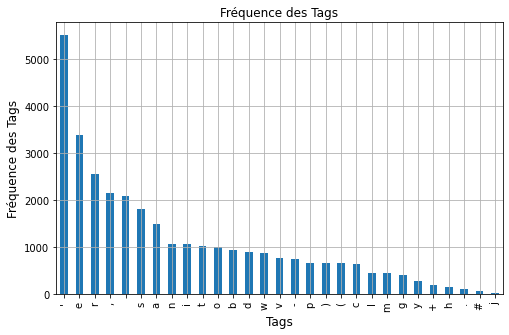

In [128]:
import collections


liste = df_svc_on_lda["SVC_LDA"].to_list()
tags_flat = [item for sublist in liste for item in sublist]

counter=collections.Counter(tags_flat)
dictionary=dict(counter)
df_tags_counts = pd.DataFrame(dictionary.items(), columns=['Tags', 'Counts'])
df_tags_counts = df_tags_counts.sort_values(by=['Counts'], ascending=False)

df_tags_counts.iloc[0:30].plot(x='Tags', y='Counts', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Fréquence des Tags")
plt.ylabel('Fréquence des Tags', fontsize=12)

plt.xlabel('Tags', fontsize=12)

### Frequence des mots des Titles par Tag

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


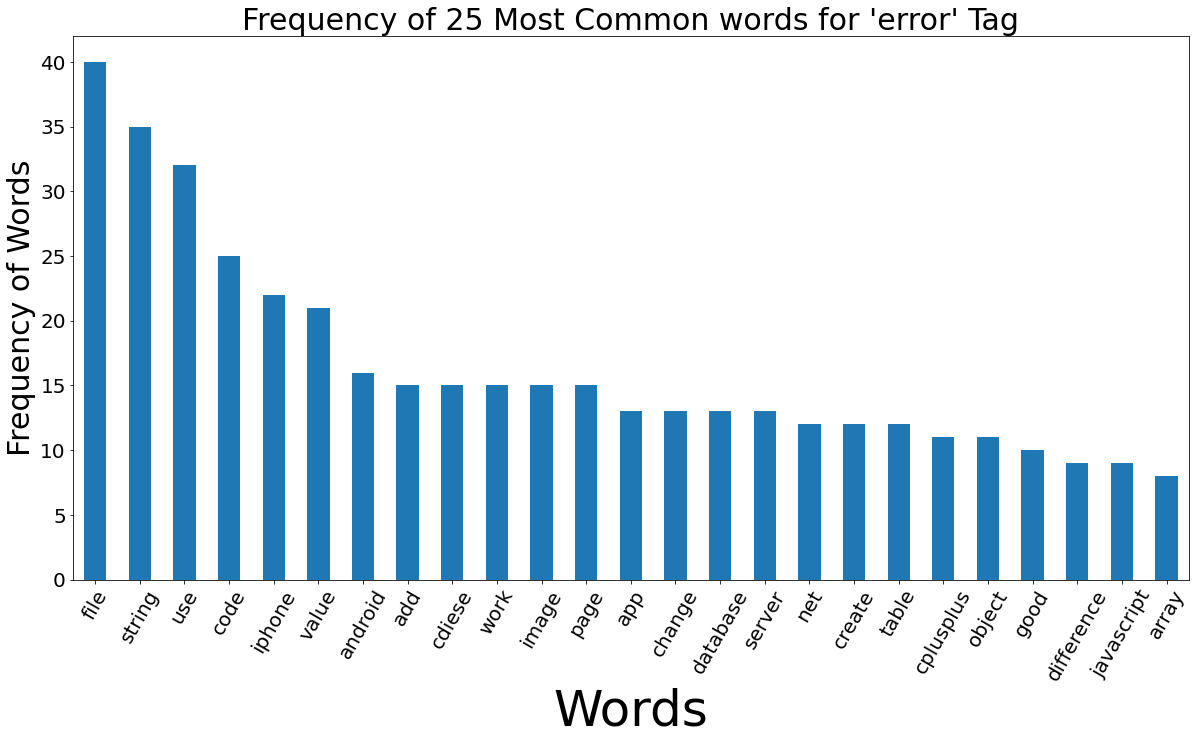

In [138]:
#Frequence des mots de titles par tag
plt.figure(figsize=(20,10))

group_by = df_concat.groupby("'error'")['Title'].apply(lambda x: collections.Counter(' '.join(x).split()))
group_by[0].sort_values(ascending=False).iloc[0:25].plot(kind='bar')      

plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title("Frequency of 25 Most Common words for 'error' Tag", fontsize=30)
plt.show()

### Nombre de Titles par Tag

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Category')

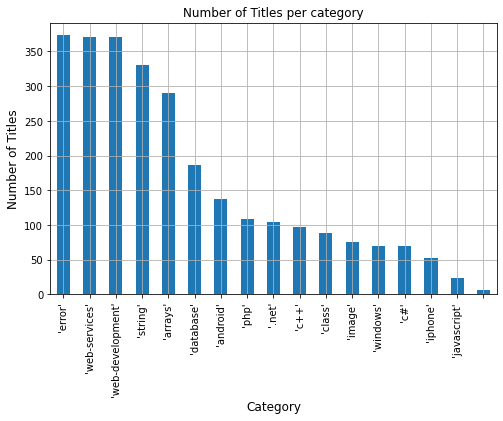

In [139]:
#df_y = df_final.drop(['Title'], axis=1)

counts = []

#list of tags
categories = list(df_y.columns.values)

for i in categories:
    #tags, sum per column
    counts.append((i, df_y[i].sum()))
    
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats = df_stats.sort_values(by = "number_of_comments", ascending=False)

df_stats.iloc[0:30].plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of Titles per category")

plt.ylabel('Number of Titles', fontsize=12)
plt.xlabel('Category', fontsize=12)

### Fréquence du nombres de Tags

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/catherinele/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nombre de Tags')

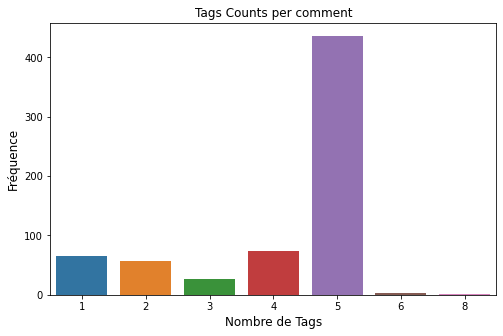

In [140]:
# sum of tags for one Title
rowsums = df_y.iloc[:,:].sum(axis=1)

#sum for one title = x > value count of x
x=rowsums.value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Tags Counts per comment")
plt.ylabel('Fréquence', fontsize=12)
plt.xlabel('Nombre de Tags', fontsize=12)

Sources :

LDA:\
https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

EDA Exploratort Data Analysis, LDA - CountVectorizer & NMF - TFidf :

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

NMF and LDA with Scikit Learn:\
https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730

ACP et autre types de vectorisation: \
http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/text_sentiment_wordvec.html


CountVectorizer et tfid en matrice:\
https://www.codegrepper.com/code-examples/whatever/counter+vectorizer+scikitlearn

MultiOutputClassifier :\
https://www.datatechnotes.com/2020/03/multi-output-classification-with-multioutputclassifier.html \

https://medium.com/analytics-vidhya/randomforest-classifier-vs-multinomial-naive-bayes-for-a-multi-output-natural-language-2426381a5217


One-vs-Rest and One-vs-One for Multi-Class Classification:\
https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/


Pickle:\
https://github.com/cloudpipe/cloudpickle

KNN classifier : \
https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

Multi-Labels Classifier: \
https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_multilabel.html#sphx-glr-auto-examples-miscellaneous-plot-multilabel-py

inverse_transform: 

https://scikit-learn.org/stable/modules/preprocessing_targets.html

Multiclass and multioutput algorithm: 

https://scikit-learn.org/stable/modules/multiclass.html